<a href="https://colab.research.google.com/github/COGS108/group03_sp20/blob/master/FinalProject_group03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting electricity usage using weather phenomena on a city-wide level

# Overview

In this project, we attempted to find the correlation between weather phenomena and city level energy demand. Our goal was to build prediction models that would use weather data to predict the energy consumption in various regions of the US. We created a variety of plots to help us understand the different weather and energy distributions. We also used 4 different modeling techniques: linear regression, polynomial regression, random forests, and gradient boosted trees to predict energy consumption. Ultimately, we found that weather phenomena is not sufficient enough to predict the energy consumption. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).





# Names
* Shubham Kulkarni
* Stephanie Kwan
* Ryuen Le
* Keith Lim




# Research Question 
Can we predict electricity consumption per day for various regions of the United States based on weather data? More specifically:

* What is the impact of temperature, precipitation, and severe weather phenomena such as thunderstorms and snow upon people’s electricity consumption patterns throughout the US? 

* Do different regions in the United States shift their electricity consumption differently in response to similar changes in weather patterns?
 
* Finally, can we use weather phenomena to predict electrical consumption?


# Background and Prior Work
As one of the most industrialized countries in the world, the United States is a leading consumer of electricity. In today’s social climate (pun intended), environmental cognizance is a global concern. In efforts to mitigate environmental impacts, it is crucial to analyze and understand where our resources are being allocated and what factors play into the consumption of these resources. We strive to find a correlation between weather conditions and the amount of energy used. In doing so, we hope to be able to predict energy consumption based on weather patterns. With this, we will be able to prepare to scale the electrical grid in response to more accurate predicted demand and reduce inefficiencies.

The Science Direct article [1] tried to predict electricity consumption using weather forecasts in London. This was done to support the transition to renewable energy since renewables have high variability in their output, and without the ability to predict grid demand accurately and with limited information, it is near impossible to transition to a primarily renewable electricity model. They co
They aimed to quantify the effects of weather on energy consumption to understand the sustainability of our current energy practices. 

[Reference 2] discusses not only the most common climate reasons, but other factors that can compound weather conditions and increase energy usage. Firstly, when the weather is particularly warm, electricity is most often used by air conditioning units. In fact, the demands for cooling can make up fifty percent of a household’s electricity bill. In addition, humidity adds to the feeling of extra warmth and can cause households to run cooling units for more time. On the other hand, when the temperature is much lower, heaters of many shapes and forms are one of the sources that most demand electricity. This leads us to believe that there will be a quadratic relationship between temperature and electricity - both low and high temperatures will lead to higher electricity usage than normal. Furthermore, conditions such as wind, ice, and snow can create issues that lead to increased energy usage. 

[Reference 3] is an excellent source of information. It is an academic research paper published to IEEE regarding the exact topic we wish to study. The author of the paper used 4 different features in their analysis: effective temperature, cooling power of the wind, daylight illumination index, and rate of precipitation. They started with a linear regression model, and then progressively fit a polynomial regression. They managed to predict one year’s worth of electrical load with less than 2% of standard deviation. They found that these chosen features worked well. This confirms our understanding that temperature is correlated to electricity. It also gives us some other essential features to include in our data analysis: precipitation and wind speed. This paper was originally published in 1958, so we believe that we will be able to do just as well, if not better, since we have significantly more ML models available for us to choose from. (this is quite out of date since our electricity patterns have changed)

Reading and understanding these articles will help us discover features that previous modeling attempts found to be salient, as well as what they found to be irrelevant. This will serve as an excellent starting point for our exploratory data analysis, and will help us build an initial model. We will need to continue looking for articles regarding modeling specifically, so that we can see what sort of models work effectively for this particular problem, and what models we should avoid.
 
Reference 1: [The increasing impact of weather on electricity supply and demand](https://www.sciencedirect.com/science/article/pii/S0360544217320844)

Reference 2: [Relationship Between Weather & Energy Use ](https://mrelectric.com/blog/the-relationship-between-weather-and-energy-usage)

Reference 3: [The relationship between weather and electricity demand](https://sci-hub.tw/10.1049/pi-c.1959.0007)
  


# Hypothesis
We believe that there is a correlation between weather and electricity consumption, and we will be able to forecast electricity consumption using weather data. 

We believe that:
* temperature and electricity consumption will display a positive quadratic relationship: people will tend to use higher amounts of electricity at both very low temperatures and at very high temperatures. 

* precipitation and electricity consumption will display a positive linear relationship: more precipitation will lead to higher electricity use.

* severe weather conditions such as thunderstorms or snow will lead to higher electricity use.

Furthermore, we contend that coastal areas will have a stronger response to similar changes in weather conditions than inland areas.
Finally, we believe that we can use weather patterns to predict electricity consumption on a regional level by generalizing the patterns that emerge during our analysis and applying linear regression and random forests.

# Datasets

We used 3 datasets in our project: 
1. weather information for our 10 cities sourced from DarkSky API
2. electricity information for 7 of the 10 cities from the Energy Information Administration
3. electricity information for the remaining three cities sourced directly from ERCOT, the Electricity Reliability Council of Texas. 

The way that we combined these datasets was by inner joining on the city and the datetime of the weather/energy data. 

## Weather Dataset
This dataset was sourced from DarkSky API. They are a common provider of weather data. Their API aggregates data from 13 different providers, including National Oceanic and Atmospheric Administration, National Centers for Environmental Prediction, and a variety of raw radar data that is processed into weather predictions by their own forecasting system. 

The dataset includes hourly weather data from our 10 cities, totaling 16574 weather observations per city to cover the 23-month timeframe. It includes 19 features, but the ones we chose to focus on were temperature, probability of precipitation, wind speed, humidity, time, and a short text summary of the weather in this hour. 

The API provided this data in JSON format, with 24 hours of data at a single location per request. We used a script to obtain all of the data, and concatenated it into a single JSON file for each location. 

From there, we used `pandas` to read these 10 JSON file as DataFrames and concatenated them together for use in our project. We also saved it this single DataFrame as a CSV for easy access in future projects.

The API can be found at: [darksky.net/dev](https://darksky.net/dev)

Our merged dataset can be found in CSV format in our [Kaggle Dataset](https://www.kaggle.com/shubhamkulkarni01/us-top-10-cities-electricity-and-weather-data)


## EIA Energy Dataset
This dataset was sourced from the Energy Information Administration (EIA). They are a government agency that collects, analyzes, and disseminates energy data. This data specifically comes from their biannnual reports on electricity usage. 

The data includes hourly observations for 7 of our 10 cities - the Texas cities had to be obtained from a different source because the data was missing from the EIA datasets. It included a variety of different features, including electricity demand in megawatts, generation in megawatts, generation separated by type of fuel, the balancing authority and subregion reporting the data, and a variety of dates. We used the demand in megawatts, a datetime, and combined the balancing authority and subregion to come up with cities. We also scaled each cities' demand by population to ensure that we're seeing the relative differences in electricity consumption rather than just magnifying differences in population as absolute numbers are likely to do.

The EIA provided this data in CSV format as 4 different files, each spanning 6 months. We used `pandas` to concatenate these files together. Our research allowed us to link balancing authorities with cities. 

The EIA CSVs can be found using the [EIA Grid Monitor](https://www.eia.gov/beta/electricity/gridmonitor/dashboard/electric_overview/US48/US48)

Our merged dataset can be found in CSV format in our [Kaggle Dataset](https://www.kaggle.com/shubhamkulkarni01/us-top-10-cities-electricity-and-weather-data)

## Texas Energy Dataset
This dataset was sourced from the Electricity Reliability Council of Texas (ERCOT). They are the balancing authority for Texas. This data specifically comes from their annual reports on electricity usage. 

The data includes hourly observations for the three Texas cities that were missing from the EIA datasets - Dallas, San Antonio, and Houston. It included a variety of different features, including electricity demand in megawatts, the  subregion reporting the data, and the date of reporting. We used the demand in megawatts, a datetime, and converted the subregion data to cities using prior research. We also scaled each cities' demand by population to ensure that we're seeing the relative differences in electricity consumption rather than just magnifying differences in population as absolute numbers are likely to do.

ERCOT provided this data in CSV format as 3 different files, each spanning 1 year. We used files from 2018, 2019, and 2020. We used `pandas` to concatenate these files together. 

The ERCOT CSVs can be found using at [ERCOT Hourly Load Data Archives](http://www.ercot.com/gridinfo/load/load_hist/)

Our merged dataset can be found in CSV format in our [Kaggle Dataset](https://www.kaggle.com/shubhamkulkarni01/us-top-10-cities-electricity-and-weather-data)

# Setup


In [2]:
# Data and plotting
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm
import matplotlib.patches as mpatches

# Setting graph styles
sns.set(rc={"font.size":20,"axes.titlesize":30,"axes.labelsize":24})   
sns.set_style('ticks', {'axes.spines.right': False, 'axes.spines.top': False})

plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', figsize=(16,9))

# EDA
import scipy.stats as stats

# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Linear Regresssion
import statsmodels.api as sm
import patsy
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Random Tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder 

# XGBoost
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Data cleaning

We're going to start with some data cleaning. We'll import our CSVs into Pandas, parse them appropriately with the help of NumPy, and then write them back onto the disk. In our exploratory analysis, we'll use the CSVs from the disk.



## Parsing Subregion Data

Let's define a method that's going to help up clean up our data. 
We need the Demand column to be numerical, so this method will help us convert the strings into numbers.

We're going to strip it of whitespace and remove all the commas so that we can parse it as a `float`. Demand can be fractional, so using `int` will lose some data that we don't need to discard. Finally, if a value is missing, let's change it from a string to the NumPy `NaN` object.

In [0]:
def standardize_demand(string):
    string = str(string)
    string = string.strip().replace(',','')
    
    if string == 'nan': 
        return np.nan
    
    return float(string)

Our next step is going to be generating a more understandable feature that will help us locate the data. For that, we're going to use the balancing authority who supplied the energy, stored in the `company` column, and the sub-region to which the electricity was supplied, stored in the `region` column. 

The association of cities to balancing authority + sub-region is from our research. We're choosing to focus on large cities because it's easier to isolate energy consumption. For instance, NYC is designated as its own sub-region by the local balancing authority, which makes it very easy to find energy data for only NYC. If we used smaller cities, we wouldn't be able to extract the correct energy consumption figures.

To make it easier for us, we're going to define it in a lookup table and write a method which takes a DataFrame and a city and extracts energy consumption of the relevant city from that DataFrame and returns it.

In [0]:
cityLookupTable = {
    'nyc': ('NYIS', 'ZONJ'),
    'la':('CISO', 'SCE'),
    'houston':('ERCO', 'COAS'),
    'philadelphia':('PJM', 'PE'),
    'san antonio': ('ERCO', 'SCEN'),
    'san diego':('CISO', 'SDGE'),
    'dallas': ('ERCO', 'NCEN'),
    'san jose': ('CISO', 'PGAE')
}
def getCity(city, data=None): 
    
    return data[(data['company'] == cityLookupTable[city][0]) & \
                (data['region'] == cityLookupTable[city][1])] \
                .assign(city=city).reset_index(drop=True)

We're going to use the method we just wrote to extract the relevant cities that we're using for data analysis from our large DataFrame 

In [5]:
df1 = pd.read_csv('/content/drive/My Drive/data/subregion/EIA930_SUBREGION_2018_Jul_Dec.csv')
# df1 = pd.read_csv('./data/subregion/EIA930_SUBREGION_2018_Jul_Dec.csv')

# RESET COLUMN NAMES
df1.columns = ['company', 'date', 'hour', 'region', 'demand', 'local_time', 'utc_time']

# DROP IRRELEVANT COLUMNS
df1 = df1[['company', 'region', 'demand', 'local_time', 'utc_time']]

# CLEAN DATA
df1['demand'] = df1['demand'].apply(standardize_demand)
df1['utc_time'] = pd.to_datetime(df1['utc_time'])
df1['local_time'] = pd.to_datetime(df1['local_time'])

# Extract cities from dataframe
nyc = getCity('nyc',df1)
la = getCity('la',df1)
houston = getCity('houston',df1)
philadelphia = getCity('philadelphia',df1)
san_antonio = getCity('san antonio',df1)
san_diego = getCity('san diego',df1)
dallas = getCity('dallas',df1)
san_jose = getCity('san jose',df1)

# concat all the cities together
df1 = pd.concat([nyc, la, houston, philadelphia, san_antonio, san_diego, dallas, san_jose]).reset_index(drop=True)
df1.head(), df1.shape

(  company region  demand          local_time            utc_time city
 0    NYIS   ZONJ  7269.0 2018-07-01 01:00:00 2018-07-01 05:00:00  nyc
 1    NYIS   ZONJ  6977.0 2018-07-01 02:00:00 2018-07-01 06:00:00  nyc
 2    NYIS   ZONJ  6725.0 2018-07-01 03:00:00 2018-07-01 07:00:00  nyc
 3    NYIS   ZONJ  6539.0 2018-07-01 04:00:00 2018-07-01 08:00:00  nyc
 4    NYIS   ZONJ  6415.0 2018-07-01 05:00:00 2018-07-01 09:00:00  nyc,
 (35336, 6))

Now that we know how to parse the data from a single CSV into a DataFrame, we're going to automate the process by writing a method that will transform a CSV into a DataFrame like we just made. 

In [0]:
def create_dataframe(csv):
    df1 = pd.read_csv(csv)
    
    # RESET COLUMN NAMES
    df1.columns = ['company', 'date', 'hour', 'region', 'demand', 'local_time', 'utc_time']

    # DROP IRRELEVANT COLUMNS
    df1 = df1[['company', 'region', 'demand', 'local_time', 'utc_time']]

    # CLEAN DATA
    df1['demand'] = df1['demand'].apply(standardize_demand)
    df1['utc_time'] = pd.to_datetime(df1['utc_time'])
    df1['local_time'] = pd.to_datetime(df1['local_time'])
    
    # Get cities from dataframe
    nyc = getCity('nyc',df1)
    la = getCity('la',df1)
    houston = getCity('houston',df1)
    philadelphia = getCity('philadelphia',df1)
    san_antonio = getCity('san antonio',df1)
    san_diego = getCity('san diego',df1)
    dallas = getCity('dallas',df1)
    san_jose = getCity('san jose',df1)

    # concat all the cities together and return
    df1 = pd.concat([nyc, la, houston, philadelphia, san_antonio, san_diego, dallas, san_jose]).reset_index(drop=True)
    return df1

Let's run it for all 3 remaining CSVs.

In [0]:
# df2 = create_dataframe('./data/subregion/EIA930_SUBREGION_2019_Jan_Jun.csv')
# df3 = create_dataframe('./data/subregion/EIA930_SUBREGION_2019_Jul_Dec.csv')
# df4 = create_dataframe('./data/subregion/EIA930_SUBREGION_2020_Jan_Jun.csv')

df2 = create_dataframe('/content/drive/My Drive/data/subregion/EIA930_SUBREGION_2019_Jan_Jun.csv')
df3 = create_dataframe('/content/drive/My Drive/data/subregion/EIA930_SUBREGION_2019_Jul_Dec.csv')
df4 = create_dataframe('/content/drive/My Drive/data/subregion/EIA930_SUBREGION_2020_Jan_Jun.csv')


Let's put all of our data together, so that we can better explore the relationships in the data during our Exploratory Data Analysis.

In [0]:
cleaned_data = pd.concat([df1, df2, df3, df4])

We're just going to print out some basic information to double check that our data parsing and validation processes didn't run into any unexpected errors.

In [9]:
cleaned_data[cleaned_data['demand'].isna()].groupby(['city']).size()

city
dallas          7944
houston         7944
la               105
nyc               24
philadelphia    1801
san antonio     7944
san diego        105
san jose         105
dtype: int64

It looks like Dallas, Houston, and San Antonio have a lot of null values. 7944 hourly reports that are null is equivalent to just about 331 days - almost a full year. Since they have so many null values, we're going to use another dataset that specifically includes Texas data. This dataset came from ERCOT directly, rather than from the EIA. 

We're also going to save this CSV to file. Before we save our data, we can go ahead and drop that unnamed index - it isn't serving much of a purpose at the moment.

In [0]:
# cleaned_data.to_csv('./data/cleaned_subregion_data.csv', index=False)
# cleaned_data.to_csv('/content/drive/My Drive/data/cleaned_subregion_data.csv', index=False)

## Parsing Balance Data

Let's define a method that's going to help up clean up our data. 
We need the Demand column to be numerical, so this method will help us convert the strings into numbers.

We're going to strip the string of whitespace and remove all the commas so that we can parse it as a `float`. Demand can be fractional, so using `int` will lose some data that we don't need to discard. Finally, if a value is missing, let's change it from a string to the NumPy `NaN` object.

In [0]:
# Cleans integer columns
def clean_nums(string):
    string = str(string)
    string = string.strip().replace(',','')
    
    if string == 'nan': 
        return np.nan
    
    return float(string)

Let's define another method that can help us turn a CSV file into a complete DataFrame like we did for the Subregion datasets.

In [0]:
# Takes the name of the csv file and creates a csv file
def create_dataframe(csv_file_name):
    df = pd.read_csv('/content/drive/My Drive/data/balance/' + csv_file_name, low_memory=False)
#     df = pd.read_csv('./data/balance/' + csv_file_name, low_memory=False)
    df = df[['Balancing Authority','Local Time at End of Hour', 'UTC Time at End of Hour','Demand (MW)']]
    df.columns = ['company', 'local_time', 'utc_time', 'demand']
    desired_companies = ['AZPS', 'SCL']
    df = df[df['company'].isin(desired_companies)]
    df['demand'] = df['demand'].apply(clean_nums)
    df['local_time'] = pd.to_datetime(df['local_time'])
    df['utc_time'] = pd.to_datetime(df['utc_time'])
    return df

We're ready to parse our data! Let's run it through our method and get structured DataFrames out of it.

We're going to concatenate these DataFrames together so we have all the data together for our later analysis. We're also going to extract the data we need and drop all the rest because it's not relevant to our analysis.

In [13]:
csv_files = ['EIA930_BALANCE_2018_Jul_Dec.csv',
             'EIA930_BALANCE_2019_Jan_Jun.csv',
             'EIA930_BALANCE_2019_Jul_Dec.csv',
             'EIA930_BALANCE_2020_Jan_Jun.csv' ]

# Turn all of the data we have into a DataFrame
df_array = []
for csv in csv_files: 
    df_array += [create_dataframe(csv)]
df = pd.concat(df_array, axis=0)

# Extract the parts of the DataFrame we care about - Seattle, WA and Phoenix, AZ
df1 = df[df['company'] == 'AZPS']
df2 = df[df['company'] == 'SCL']

# Concatenate all of our data
df = pd.concat([df1, df2], axis=0)

# Create a city column so that we know what city we're looking at without deciphering electricity provider codes.
df['city'] = df['company'].apply(lambda x: 'phoenix' if (x == 'AZPS') else 'seattle')

# Reset the index because we took a subset of the original DataFrame which means our indices are no longer contiguous
df = df.reset_index(drop=True)

df

company          local_time            utc_time  demand     city
0        AZPS 2018-07-01 01:00:00 2018-07-01 08:00:00  3497.0  phoenix
1        AZPS 2018-07-01 02:00:00 2018-07-01 09:00:00  3256.0  phoenix
2        AZPS 2018-07-01 03:00:00 2018-07-01 10:00:00  3065.0  phoenix
3        AZPS 2018-07-01 04:00:00 2018-07-01 11:00:00  2929.0  phoenix
4        AZPS 2018-07-01 05:00:00 2018-07-01 12:00:00  2833.0  phoenix
...       ...                 ...                 ...     ...      ...
31915     SCL 2020-04-25 20:00:00 2020-04-26 03:00:00     NaN  seattle
31916     SCL 2020-04-25 21:00:00 2020-04-26 04:00:00     NaN  seattle
31917     SCL 2020-04-25 22:00:00 2020-04-26 05:00:00     NaN  seattle
31918     SCL 2020-04-25 23:00:00 2020-04-26 06:00:00     NaN  seattle
31919     SCL 2020-04-26 00:00:00 2020-04-26 07:00:00     NaN  seattle

[31920 rows x 5 columns]

It looks like we have some null values in our data. Let's find out just how many and which city is causing this.

In [14]:
df.isna().sum(axis=1).sum()

76

In [15]:
df[df['demand'].isna()].groupby(['city']).size()

city
phoenix    24
seattle    52
dtype: int64

That doesn't look too bad! It seems like this data is in better shape than our other dataset. Let's save it into a CSV for later use. While we're doing that, we're going to get rid of the numerical index, because it doesn't serve a purpose right now.

In [0]:
# df.to_csv('/content/drive/My Drive/data/cleaned_balance_data.csv', index=False)
# df.to_csv('./data/cleaned_balance_data.csv', index=False)

## Parsing Texas Data

Let's define a couple of methods that are going to help up clean up our data. 
We need the Demand column to be numerical, so this method will help us convert the strings into numbers.

We're going to strip it of whitespace and remove all the commas so that we can parse it as a `float`. Demand can be fractional, so using `int` will lose some data that we don't need to discard. Finally, if a value is missing, let's change it from a string to the NumPy `NaN` object.

In [0]:
def standardize_demand(string):
    string = str(string)
    string = string.strip().replace(',','')
    
    if string == 'nan': 
        return np.nan
    
    return float(string)

This next method will help us parse the time data. ERCOT doesn't report their time data in standard format (hours from 0 to 23) but instead with hours starting at 1:00 and ending at 24:00 which is really 0:00 on the next day.

If the string contains '24:00' (if it is data for hour 24), then we want to convert it to the date '0:00' on the following day.
Otherwise, we want to convert it to the date that it says (string to DateTime).

In [0]:
def standardize_time(string):
    string = str(string)
    if '24:00' in string: 
        return pd.to_datetime(string[:10]+' 00:00') + pd.DateOffset(1)
    return pd.to_datetime(string)

We're going to automate the process by writing a method that will transform a CSV into a DataFrame with the columns standardized like we need.

In [0]:
def create_dataframe(csv):
    df1 = pd.read_csv(csv)

    # RESET COLUMN NAMES
    df1.columns = ['date', 'houston', 'east', 'fwest', 'north', 'dallas', 'south', 'san antonio', 'west', 'total']

    # DROP IRRELEVANT COLUMNS
    df1 = df1[['date', 'houston', 'san antonio', 'dallas']]

    # CLEAN DATA
    df1['houston'] = df1['houston'].apply(standardize_demand)
    df1['dallas'] = df1['dallas'].apply(standardize_demand)
    df1['san antonio'] = df1['san antonio'].apply(standardize_demand)

    df1['date'] = df1['date'].apply(standardize_time)


    df1['date'] = pd.to_datetime(df1['date'])
    
    return df

Let's run it for all 3 CSVs.

In [20]:
df1 = create_dataframe('/content/drive/My Drive/data/texas_sucks/texas2018.csv')

df2 = create_dataframe('/content/drive/My Drive/data/texas_sucks/texas2019.csv')

df3 = create_dataframe('/content/drive/My Drive/data/texas_sucks/texas2020.csv')



# df1 = create_dataframe('./data/texas_sucks/texas2018.csv')

# df2 = create_dataframe('./data/texas_sucks/texas2019.csv')

# df3 = create_dataframe('./data/texas_sucks/texas2020.csv')

/usr/local/lib/python3.6/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname DST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


Let's put all of our data together, so that we can better explore the relationships in the data during our Exploratory Data Analysis.

In [0]:
cleaned_data = pd.concat([df1, df2, df3])

In [22]:
df1

company          local_time            utc_time  demand     city
0        AZPS 2018-07-01 01:00:00 2018-07-01 08:00:00  3497.0  phoenix
1        AZPS 2018-07-01 02:00:00 2018-07-01 09:00:00  3256.0  phoenix
2        AZPS 2018-07-01 03:00:00 2018-07-01 10:00:00  3065.0  phoenix
3        AZPS 2018-07-01 04:00:00 2018-07-01 11:00:00  2929.0  phoenix
4        AZPS 2018-07-01 05:00:00 2018-07-01 12:00:00  2833.0  phoenix
...       ...                 ...                 ...     ...      ...
31915     SCL 2020-04-25 20:00:00 2020-04-26 03:00:00     NaN  seattle
31916     SCL 2020-04-25 21:00:00 2020-04-26 04:00:00     NaN  seattle
31917     SCL 2020-04-25 22:00:00 2020-04-26 05:00:00     NaN  seattle
31918     SCL 2020-04-25 23:00:00 2020-04-26 06:00:00     NaN  seattle
31919     SCL 2020-04-26 00:00:00 2020-04-26 07:00:00     NaN  seattle

[31920 rows x 5 columns]

Finally, we're going to save our data as a CSV file so that we can use it for our exploratory analysis.

Before we save our data, we can go ahead and drop that unnamed index - it isn't serving much of a purpose at the moment.

In [0]:
# cleaned_data.to_csv('/content/drive/My Drive/data/cleaned_texas_data.csv', index=False)
# cleaned_data.to_csv('./data/cleaned_texas_data.csv', index=False)

We can pick up with this file in the Exploratory Analysis section.

Overall our data was relatively clean since it came from very official sources (API data for weather, government / non-profit data for electricity).

It took minimal data cleaning to get it into the right format. Other than DateTime information being encoded as a string, there was nothing to do.

For some of our models, we had to impute the `NaN` values since the strategies we used cannot handle `NaNs`. We also encoded some of our categorical data in a numerical format so that we could use it in the model. Both of these are done later on when we run the models.

# Exploratory Data Analysis

## Setup

Here we'll define a few methods that will help us with setting up axes label for the various plots we make.

In [0]:
DAYS_SINCE_0 = 719163
DEGREE = u"\u2109"

def degrees(arr): 
    return [f'{element:0.0f}{DEGREE}' for element in arr]

def percents(arr): 
    return [f'{100*element:0.1f}%' for element in arr]

def abs_percents(arr): 
    return [f'{element:0.1f}%' for element in arr]

In [25]:
nyc = pd.read_json('/content/drive/My Drive/data/weather/nyc.json')
nyc['city'] = 'nyc'
print('Read 1/10', end='\r')

la = pd.read_json('/content/drive/My Drive/data/weather/la.json')
la['city'] = 'la'
print('Read 2/10', end='\r')

houston = pd.read_json('/content/drive/My Drive/data/weather/houston.json')
houston['city'] = 'houston'
print('Read 3/10', end='\r')

dallas = pd.read_json('/content/drive/My Drive/data/weather/dallas.json')
dallas['city'] = 'dallas'
print('Read 4/10', end='\r')

philadelphia = pd.read_json('/content/drive/My Drive/data/weather/philadelphia.json')
philadelphia['city'] = 'philadelphia'
print('Read 5/10', end='\r')

phoenix = pd.read_json('/content/drive/My Drive/data/weather/phoenix.json')
phoenix['city'] = 'phoenix'
print('Read 6/10', end='\r')


san_diego = pd.read_json('/content/drive/My Drive/data/weather/san_diego.json')
san_diego['city'] = 'san diego'
print('Read 7/10', end='\r')


san_antonio = pd.read_json('/content/drive/My Drive/data/weather/san_antonio.json')
san_antonio['city'] = 'san antonio'
print('Read 8/10', end='\r')


san_jose = pd.read_json('/content/drive/My Drive/data/weather/san_jose.json')
san_jose['city'] = 'san jose'
print('Read 9/10', end='\r')

seattle = pd.read_json('/content/drive/My Drive/data/weather/seattle.json')
seattle['city'] = 'seattle'
print('Read 10/10')

print('Complete.')

# nyc = pd.read_json('data/weather/nyc.json')
# nyc['city'] = 'nyc'
# print('Read 1/10', end='\r')

# la = pd.read_json('data/weather/la.json')
# la['city'] = 'la'
# print('Read 2/10', end='\r')

# houston = pd.read_json('data/weather/houston.json')
# houston['city'] = 'houston'
# print('Read 3/10', end='\r')

# dallas = pd.read_json('data/weather/dallas.json')
# dallas['city'] = 'dallas'
# print('Read 4/10', end='\r')

# philadelphia = pd.read_json('data/weather/philadelphia.json')
# philadelphia['city'] = 'philadelphia'
# print('Read 5/10', end='\r')

# phoenix = pd.read_json('data/weather/phoenix.json')
# phoenix['city'] = 'phoenix'
# print('Read 6/10', end='\r')


# san_diego = pd.read_json('data/weather/san_diego.json')
# san_diego['city'] = 'san diego'
# print('Read 7/10', end='\r')


# san_antonio = pd.read_json('data/weather/san_antonio.json')
# san_antonio['city'] = 'san antonio'
# print('Read 8/10', end='\r')


# san_jose = pd.read_json('data/weather/san_jose.json')
# san_jose['city'] = 'san jose'
# print('Read 9/10', end='\r')

# seattle = pd.read_json('data/weather/seattle.json')
# seattle['city'] = 'seattle'
# print('Read 10/10')

# print('Complete.')

Read 10/10
Complete.


In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [27]:
df_weather = pd.concat([nyc, la, houston, dallas, philadelphia, phoenix, san_diego, san_antonio, san_jose, seattle])
df_weather['date'] = pd.to_datetime(df_weather['time'], unit='s')
df_weather.head()

time summary         icon  ...  precipAccumulation  city                date
0  1530504000   Clear  clear-night  ...                 NaN   nyc 2018-07-02 04:00:00
1  1530507600   Clear  clear-night  ...                 NaN   nyc 2018-07-02 05:00:00
2  1530511200   Clear  clear-night  ...                 NaN   nyc 2018-07-02 06:00:00
3  1530514800   Clear  clear-night  ...                 NaN   nyc 2018-07-02 07:00:00
4  1530518400   Clear  clear-night  ...                 NaN   nyc 2018-07-02 08:00:00

[5 rows x 21 columns]

Let's start with some weather analysis! We're going to start with NYC, and then extend our analysis to all the other cities.

## NYC - Temperature Analysis

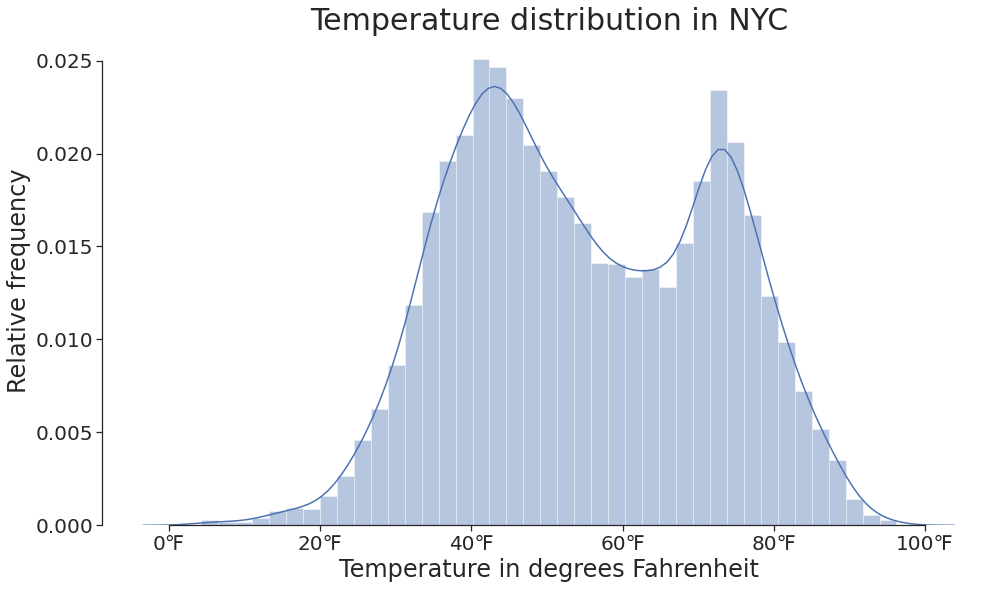

In [28]:
# set up a query so that we can use this whenever we need to query NYC data later
# plt.figure(figsize=(16,9))
nyc = df_weather['city'] == 'nyc'

# Let's start with temperature
ax = sns.distplot(df_weather[nyc]['temperature'])

sns.despine(trim=True)

ax.set_title('Temperature distribution in NYC')
ax.set_xlabel('Temperature in degrees Fahrenheit')
ax.set_ylabel('Relative frequency')
ax.set_xticklabels(degrees(ax.get_xticks()))
None

As expected, temperature is a bimodal graph. This is probably because of the varying seasons, especially in a place like NYC with freezing winters and warmer summers. Let's confirm this with a couple of additional plots.

In [29]:
winter = (df_weather.loc[nyc,'date'].dt.month == 12) | (df_weather.loc[nyc,'date'].dt.month < 3) # December, January February
spring = (df_weather.loc[nyc,'date'].dt.month >= 3) & (df_weather.loc[nyc, 'date'].dt.month < 6) # March, April, May
summer = (df_weather.loc[nyc,'date'].dt.month >= 6) & (df_weather.loc[nyc, 'date'].dt.month < 9) # June, July, August
autumn = (df_weather.loc[nyc,'date'].dt.month >= 9) & (df_weather.loc[nyc, 'date'].dt.month < 12) # September, October, November

print('Winter observations: ', winter.sum(), '\nSpring observations: ', spring.sum(), \
      '\nSummer observations: ', summer.sum(), '\nAutumn observations: ', autumn.sum())

Winter observations:  4344 
Spring observations:  4204 
Summer observations:  3660 
Autumn observations:  4366


We're going to need to do a relative plot because we have significantly less summer observations than the rest.

Winter mean:  50.0523038674033 stdev:  11.357838984406165 
Spring mean:  61.5271508087533 stdev:  12.628184744306827 
Summer mean:  78.08459579119935 stdev:  11.269953135564897 
Autumn mean:  65.22132134677028 stdev:  13.99326830049132 



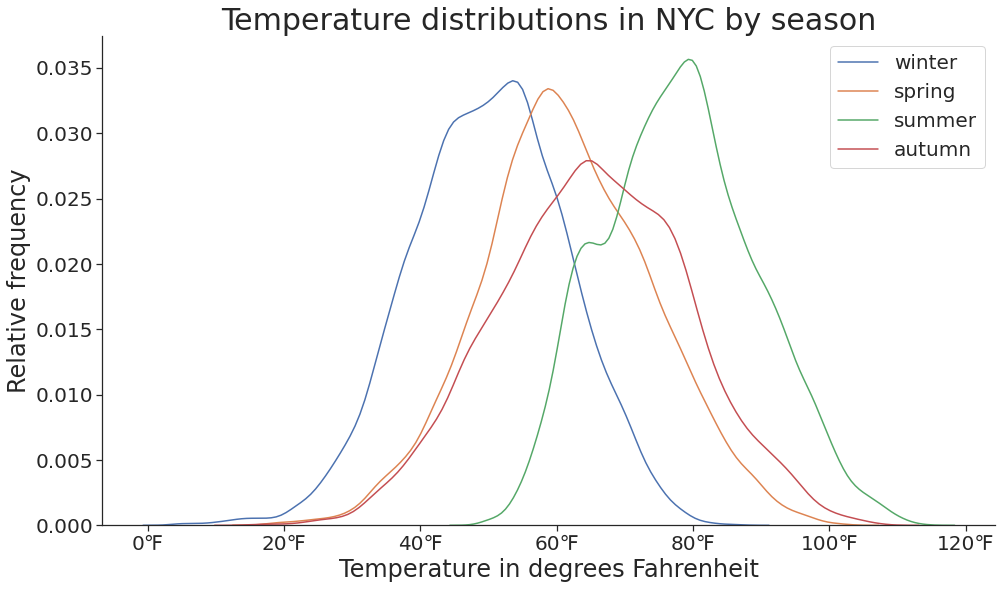

In [30]:
# fig, ax = plt.subplots()
# plt.figure(figsize=(16,9))

ax = sns.distplot(df_weather.loc[winter, 'temperature'], label='winter', kde=True, hist=False, norm_hist=True, bins=20)
sns.distplot(df_weather.loc[spring, 'temperature'], label='spring', kde=True, hist=False, norm_hist=True, bins=20)
sns.distplot(df_weather.loc[summer, 'temperature'], label='summer', kde=True, hist=False, norm_hist=True, bins=20)
sns.distplot(df_weather.loc[autumn, 'temperature'], label='autumn', kde=True, hist=False, norm_hist=True, bins=20)

ax.set_title('Temperature distributions in NYC by season')
ax.set_xlabel('Temperature in degrees Fahrenheit')
ax.set_ylabel('Relative frequency')

ax.set_xticklabels(degrees(ax.get_xticks()))

ax.legend()

print('Winter mean: ', df_weather.loc[winter, 'temperature'].mean(), 'stdev: ', np.std(df_weather.loc[winter, 'temperature']),'\n'\
     'Spring mean: ', df_weather.loc[spring, 'temperature'].mean(), 'stdev: ', np.std(df_weather.loc[spring, 'temperature']),'\n'\
     'Summer mean: ', df_weather.loc[summer, 'temperature'].mean(), 'stdev: ', np.std(df_weather.loc[summer, 'temperature']),'\n'\
     'Autumn mean: ', df_weather.loc[autumn, 'temperature'].mean(), 'stdev: ', np.std(df_weather.loc[autumn, 'temperature']),'\n')

Just as we predicted, there is a significant difference in the temperature distribution depending on which season you look at. Furthermore, the combination of the four seasons' distribution resembles the original bimodal graph that we saw with temperature. It's interesting to note that the variance across the seasons is approximately the same - about 12 degrees, but the means are vastly different. 

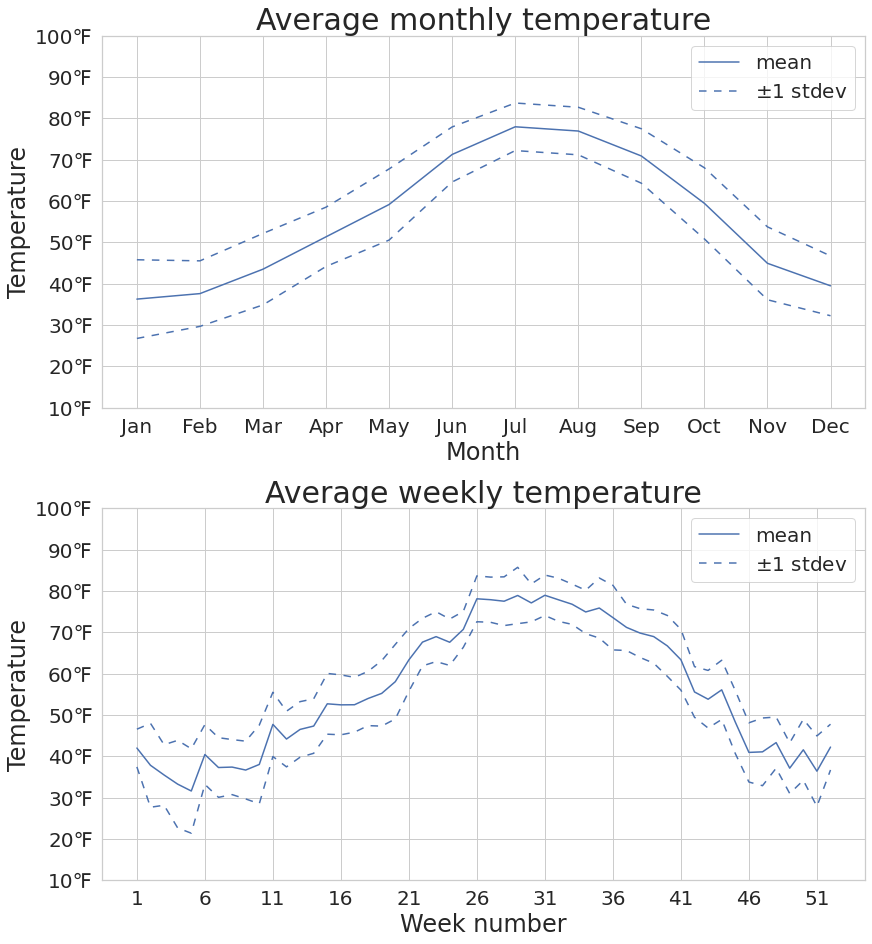

In [31]:
with sns.axes_style('whitegrid'):
  fig, (ax1, ax2) = plt.subplots(2, figsize=(12,13), constrained_layout=True)

  monthly_temp_nyc = df_weather.loc[nyc].groupby(df_weather.loc[nyc, 'date'].dt.month).mean()
  monthly_std_nyc = df_weather.loc[nyc].groupby(df_weather.loc[nyc, 'date'].dt.month).std()

  weekly_temp_nyc = df_weather.loc[nyc].groupby(df_weather.loc[nyc, 'date'].dt.week).mean()
  weekly_std_nyc = df_weather.loc[nyc].groupby(df_weather.loc[nyc, 'date'].dt.week).std()


  sns.lineplot(x=monthly_temp_nyc.index, y=monthly_temp_nyc['temperature'], ax=ax1)
  sns.lineplot(x=monthly_temp_nyc.index, y=(monthly_temp_nyc['temperature'] + monthly_std_nyc['temperature']), \
              ax=ax1, color='b')
  sns.lineplot(x=monthly_temp_nyc.index, y=(monthly_temp_nyc['temperature'] - monthly_std_nyc['temperature']), \
              ax=ax1, color='b')

  ax1.set_title('Average monthly temperature')
  ax1.set_xlabel('Month')
  ax1.set_ylabel('Temperature')

  ax1.set_xticks(np.arange(1,13))
  ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
  ax1.set_yticks(np.arange(10,101,10))
  ax1.set_yticklabels(degrees(ax1.get_yticks()))


  sns.lineplot(x=weekly_temp_nyc.index, y=weekly_temp_nyc['temperature'], ax=ax2)
  sns.lineplot(x=weekly_temp_nyc.index, y=(weekly_temp_nyc['temperature'] + weekly_std_nyc['temperature']), ax=ax2, color='b')
  sns.lineplot(x=weekly_temp_nyc.index, y=(weekly_temp_nyc['temperature'] - weekly_std_nyc['temperature']), ax=ax2, color='b')

  ax2.set_title('Average weekly temperature')
  ax2.set_xlabel('Week number')
  ax2.set_ylabel('Temperature')

  ax2.set_xticks(np.arange(1,53,5))
  ax2.set_yticks(np.arange(10,101,10))
  ax2.set_yticklabels(degrees(ax2.get_yticks()))

  [element.set_dashes((5,5)) for element in ax1.lines[-2:]]

  [element.set_dashes((5,5)) for element in ax2.lines[-2:]]

  ax1.legend(['mean', r'$\pm$1 stdev'])
  ax2.legend(['mean', r'$\pm$1 stdev'])

  None

Here we can more clearly see how the temperature changes with respect to the month / week.
It's very interesting to see that even though there is some variability of temperature with respect to week vs month (the curves are not the same), it is very minimal, and the monthly curve appears to fit quite well to the weekly data.


Using a rolling average can help us see a more gradual change in the temperature, rather than the abrupt changes in the weekly and monthly data.

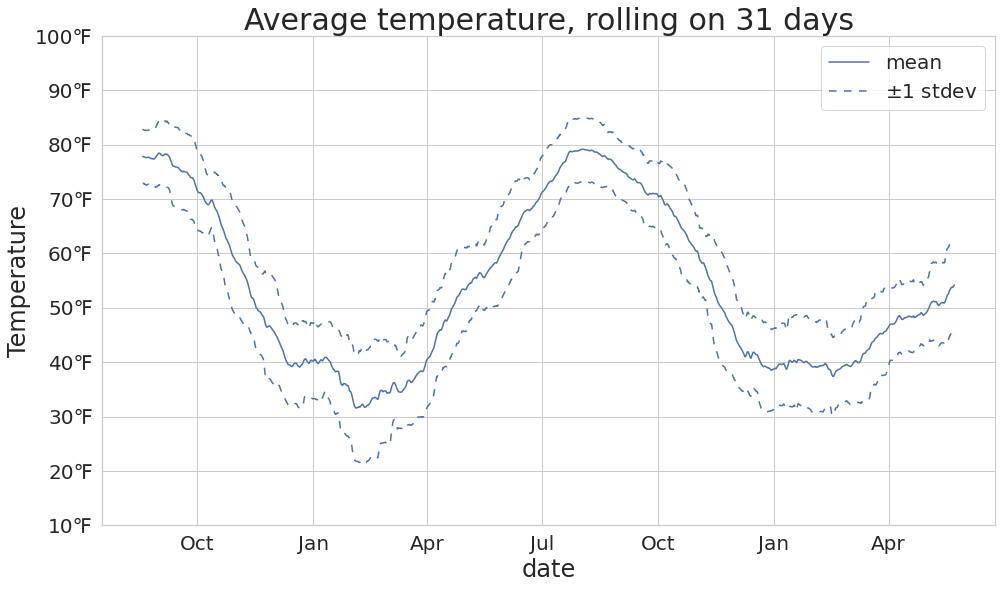

In [32]:
with sns.axes_style('whitegrid'):

  moving_average_nyc = df_weather.loc[nyc, 'temperature'].rolling(24*31)

  # plt.figure(figsize=(16,9))
  ax = sns.lineplot(x=df_weather.loc[nyc, 'date'], y=moving_average_nyc.mean())
  ax = sns.lineplot(x=df_weather.loc[nyc, 'date'], y=moving_average_nyc.mean() + moving_average_nyc.std(), color='b')
  ax = sns.lineplot(x=df_weather.loc[nyc, 'date'], y=moving_average_nyc.mean() - moving_average_nyc.std(), color='b')

  ax.set_title('Average temperature, rolling on 31 days')
  ax.set_xticklabels([f'{pd.to_datetime(element-DAYS_SINCE_0, unit="D").strftime("%b")}' for element in ax.get_xticks()])
  ax.set_yticks(np.arange(10,101,10))
  ax.set_yticklabels(degrees(ax.get_yticks()))
  ax.set_ylabel('Temperature')


  [element.set_dashes((5,5)) for element in ax.lines[-2:]]

  ax.legend(['mean', r'$\pm$1 stdev'])

  # print('The lowest rainfall was on',\
  #       df_weather.loc[(df_weather.index==moving_average_nyc.mean().idxmin()) & (nyc), 'date'].iloc[0])

  None

Now, with a rolling average, more gradual changes in temperature are accounted for. The rolling average also visualizes nearly two years of data rather than encompassing it within a single year. This will see the different temperatures between similar seasons to clarify potential changes in climate. For example, the first range from January to April seems to exhibit lower temperatures in contrast to the second range.

Let's figure out if these data originate in a Normal distribution.

In [33]:
print('The p-value for winter data being Normally distributed is:', stats.normaltest(df_weather.loc[winter, 'temperature'], nan_policy='omit')[1])
print('The p-value for spring data being Normally distributed is:', stats.normaltest(df_weather.loc[spring, 'temperature'], nan_policy='omit')[1])
print('The p-value for summer data being Normally distributed is:', stats.normaltest(df_weather.loc[summer, 'temperature'], nan_policy='omit')[1])
print('The p-value for autumn data being Normally distributed is:', stats.normaltest(df_weather.loc[autumn, 'temperature'], nan_policy='omit')[1])

print('The p-value for NYC data as a whole being Normally distributed is:', stats.normaltest(df_weather.loc[nyc, 'temperature'], nan_policy='omit')[1])

The p-value for winter data being Normally distributed is: 3.788315488746163e-35
The p-value for spring data being Normally distributed is: 0.0004985362392294891
The p-value for summer data being Normally distributed is: 2.4945129132614268e-149
The p-value for autumn data being Normally distributed is: 2.1874866750877723e-33
The p-value for NYC data as a whole being Normally distributed is: 0.0


All of these p-values fall far below our significance level of $\alpha$ =0.05, so it's highly unlikely that any of the data originate from a Normal distribution. This is very helpful as it informs us we cannot use methods designed for Normal distributions on this data.

Let's take a look at precipitation next.

## NYC - Precipitation Analysis

The average chance of rain in the winter is 8.179% 
The average chance of rain in the spring is 5.997% 
The average chance of rain in the summer is 2.740% 
The average chance of rain in the winter is 5.713% 

The standard deviation in the winter is 18.241% 
The standard deviation in the spring is 15.124% 
The standard deviation in the summer is 10.156% 
The standard deviation in the winter is 15.604% 



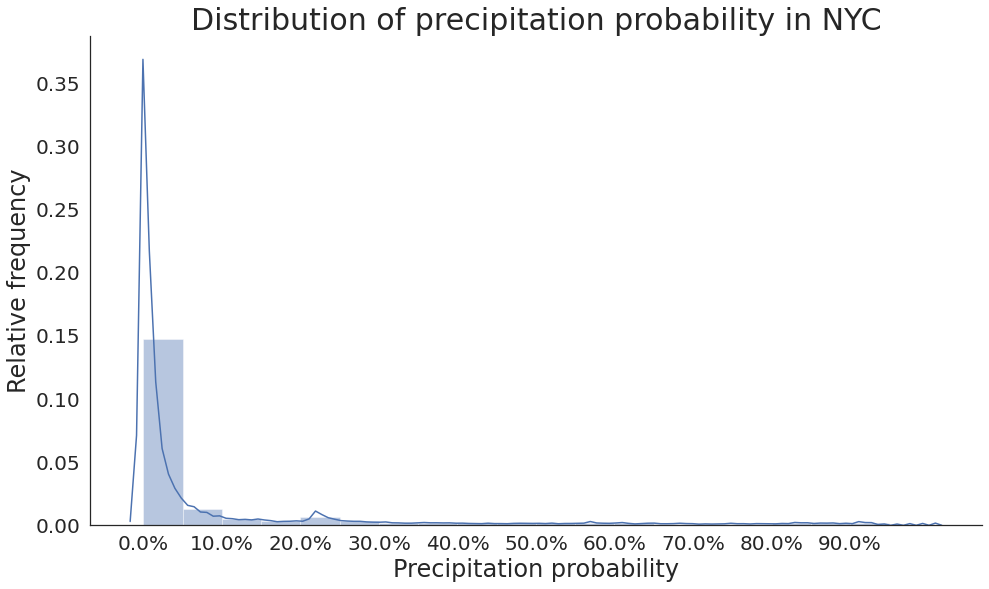

In [34]:
# plt.figure(figsize=(16,9))
with sns.axes_style('white'):
  ax1 = sns.distplot(100*df_weather.loc[nyc, 'precipProbability'], bins=20)
  sns.despine()

  ax1.set_title('Distribution of precipitation probability in NYC')
  ax1.set_xticks(np.arange(0, 100, 10))
  ax1.set_xticklabels([f'{element:0.1f}%' for element in ax1.get_xticks()])
  ax1.set_xlabel('Precipitation probability')
  ax1.set_ylabel('Relative frequency')

  print(f"The average chance of rain in the winter is {100*df_weather.loc[winter, 'precipProbability'].mean():0.3f}% \n"\
        f"The average chance of rain in the spring is {100*df_weather.loc[spring, 'precipProbability'].mean():0.3f}% \n"\
        f"The average chance of rain in the summer is {100*df_weather.loc[summer, 'precipProbability'].mean():0.3f}% \n"\
        f"The average chance of rain in the winter is {100*df_weather.loc[autumn, 'precipProbability'].mean():0.3f}% \n")

  print(f"The standard deviation in the winter is {np.std(100*df_weather.loc[winter, 'precipProbability']):0.3f}% \n"\
        f"The standard deviation in the spring is {np.std(100*df_weather.loc[spring, 'precipProbability']):0.3f}% \n"\
        f"The standard deviation in the summer is {np.std(100*df_weather.loc[summer, 'precipProbability']):0.3f}% \n"\
        f"The standard deviation in the winter is {np.std(100*df_weather.loc[autumn, 'precipProbability']):0.3f}% \n")

Historical precipitation probability as given by DarkSky roughly translates the percent of the area that was covered with precipitation. For instance, if NYC had a historical precipitation probability of 10% on June 10 2020 at 10am Eastern Time, that means that 10% of NYC was covered with precipitation at that date and time. The true definition would be the percentage of weather stations in NYC that reported precipitation at that date and time, but we picked relatively large cities so it's fair to assume that there would be no obvious skew in terms of weather station locations. Therefore, we can think of precipitation probability as the percentage of the city that was covered in precipitation during the observation hour.

In our plot, we see a large amount of clustering around probability of 0, with a heavy right skew. The initial bin is over 12000 observations high, while none of the other bins get to 2000 observations. This makes a lot of sense since most cities aren't rainy everywhere, all the time - precipitation is infrequent and sparse when it occurs.

We also see a very high standard deviation in all the months, which means that precipitation is not stable, and varies drastically within the month.

Let's take a look at the average likelihood of precipitation grouped by weeks and by months.

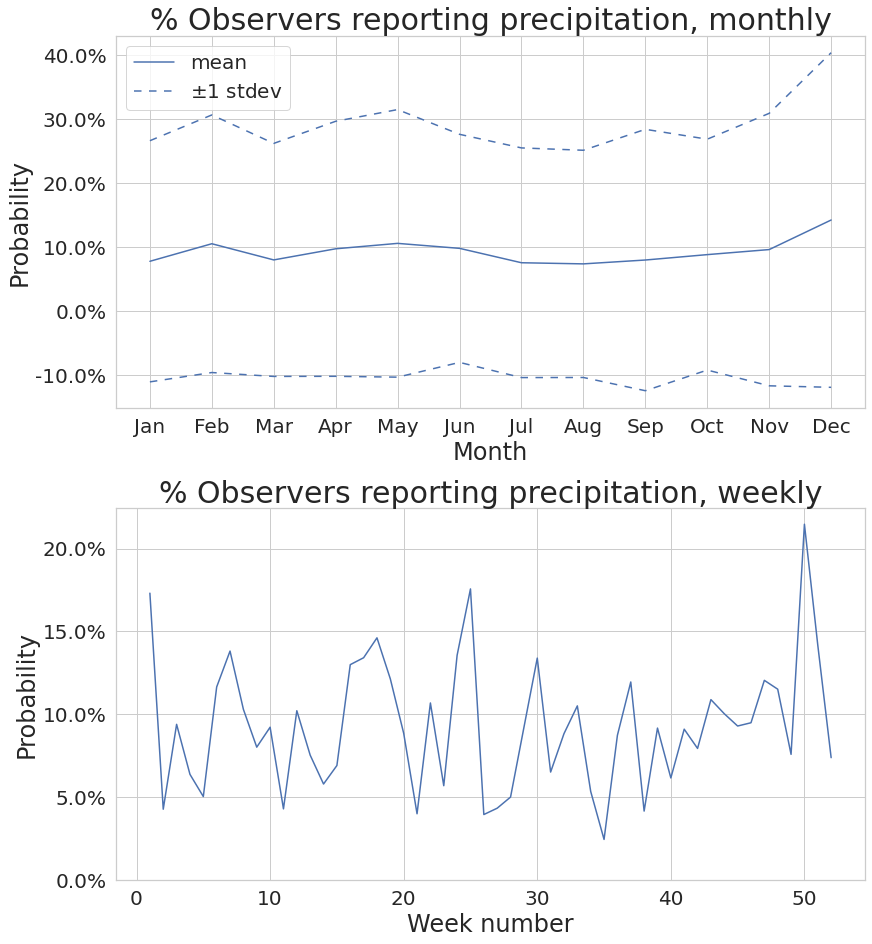

In [35]:
with sns.axes_style('whitegrid'):
  precip_nyc = df_weather.loc[nyc].reset_index(drop=True)
  fig, (ax1, ax2) = plt.subplots(2, figsize=(12,13), constrained_layout=True)

  weekly_precip_nyc = precip_nyc.groupby(precip_nyc['date'].dt.week).mean()
  weekly_precip_std_nyc = precip_nyc.groupby(precip_nyc['date'].dt.week).std()

  monthly_precip_nyc = precip_nyc.groupby(precip_nyc['date'].dt.month).mean()
  monthly_precip_std_nyc = precip_nyc.groupby(precip_nyc['date'].dt.month).std()

  sns.lineplot(x=monthly_precip_nyc.index, y=monthly_precip_nyc['precipProbability'], ax=ax1, label='mean')
  sns.lineplot(x=monthly_precip_nyc.index, y=monthly_precip_nyc['precipProbability']+monthly_precip_std_nyc['precipProbability'],\
              ax=ax1, color='b')
  sns.lineplot(x=monthly_precip_nyc.index, y=monthly_precip_nyc['precipProbability']-monthly_precip_std_nyc['precipProbability'],\
              ax=ax1, color='b', )

  ax1.set_title('% Observers reporting precipitation, monthly')
  ax1.set_xlabel('Month')
  ax1.set_ylabel('Probability')


  ax1.set_xticks(np.arange(1,13,1))
  ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
  ax1.set_yticklabels(percents(ax1.get_yticks()))

  [element.set_dashes((5,5)) for element in ax1.lines[-2:]]

  ax1.legend(['mean', r'$\pm$1 stdev'])


  sns.lineplot(x=weekly_precip_nyc.index, y=weekly_precip_nyc['precipProbability'], ax=ax2)

  ax2.set_title('% Observers reporting precipitation, weekly')
  ax2.set_xlabel('Week number')
  ax2.set_ylabel('Probability')
  ax2.set_yticks(np.arange(0,0.21,0.05))
  # print(percents(ax1.get_yticks()))
  ax2.set_yticklabels(percents(ax2.get_yticks()))

None

If we look at a monthly and weekly average of the precipitation probability, we see that the summer months have low precipitation, spring months have higher precipitation than summer, and winter + autumn has the highest precipitation. 
This makes sense since summer is hot, spring brings a lot of rain, and winter + autumn has lots of snow storms in NYC.

It is very interesting to note that precipitation experiences much more variability as we change our timescale:  the probability of precipitation varies much more on a weekly basis than on a monthly basis, and the curve for monthly probability does not appear to fit the weekly probabilities well. This is starkly different from what we saw with the temperature.

The lowest rainfall was on 2019-09-30 23:00:00


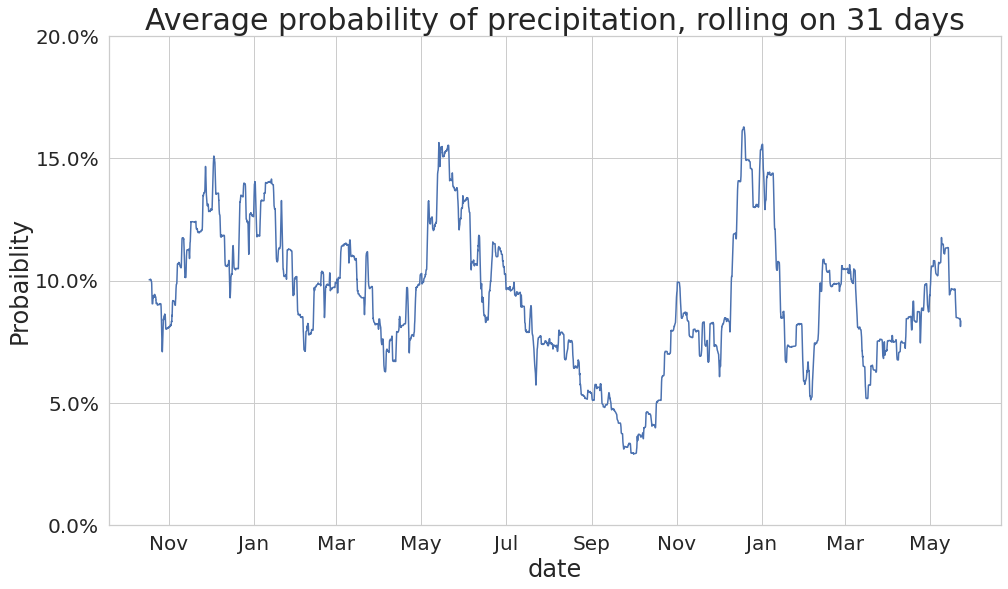

In [36]:
with sns.axes_style('whitegrid'):
  moving_average_nyc = df_weather.loc[nyc, 'precipProbability'].rolling(24*31)

  # plt.figure(figsize=(16,9))
  ax = sns.lineplot(x=df_weather.loc[nyc, 'date'], y=moving_average_nyc.mean())
  ax.set_title('Average probability of precipitation, rolling on 31 days')
  ax.set_xticklabels([f'{pd.to_datetime(element-DAYS_SINCE_0, unit="D").strftime("%b")}' for element in ax.get_xticks()])
  ax.set_yticks(np.arange(0,0.21,0.05))
  ax.set_yticklabels(percents(ax.get_yticks()))
  ax.set_ylabel('Probaiblity')

  print('The lowest rainfall was on',\
        df_weather.loc[(df_weather.index==moving_average_nyc.mean().idxmin()) & (nyc), 'date'].iloc[0])

Looking at a rolling average of precipitation, we can see how a moving average shifts over the different years. A couple of key shifts to note are the decreate in precipitation from . This helps us see how the weather pattern shifts on a monthly basis, but avoids the large jumps we see in monthly or weekly analysis. 

## NYC - Windspeed Analysis

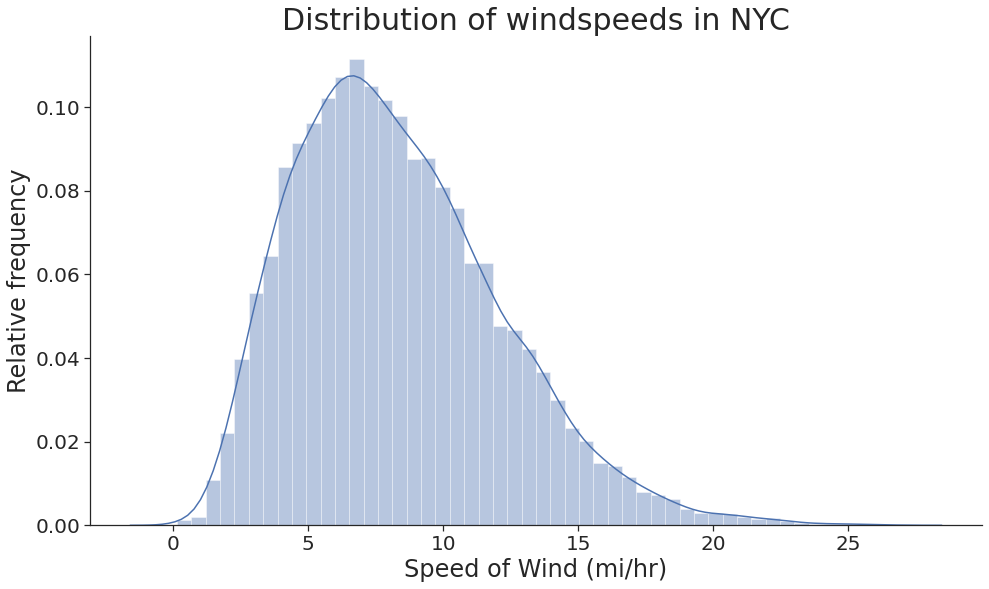

In [37]:
ax = sns.distplot(df_weather[nyc]['windSpeed'])

ax.set_title('Distribution of windspeeds in NYC')
ax.set_xlabel('Speed of Wind (mi/hr)')
ax.set_ylabel('Relative frequency')

None

Here, frequencies of wind speeds follow a normal distribution with a slight skew to the right. This makes sense as we expect NYC to not be very windy on average and for high wind days to be rare.

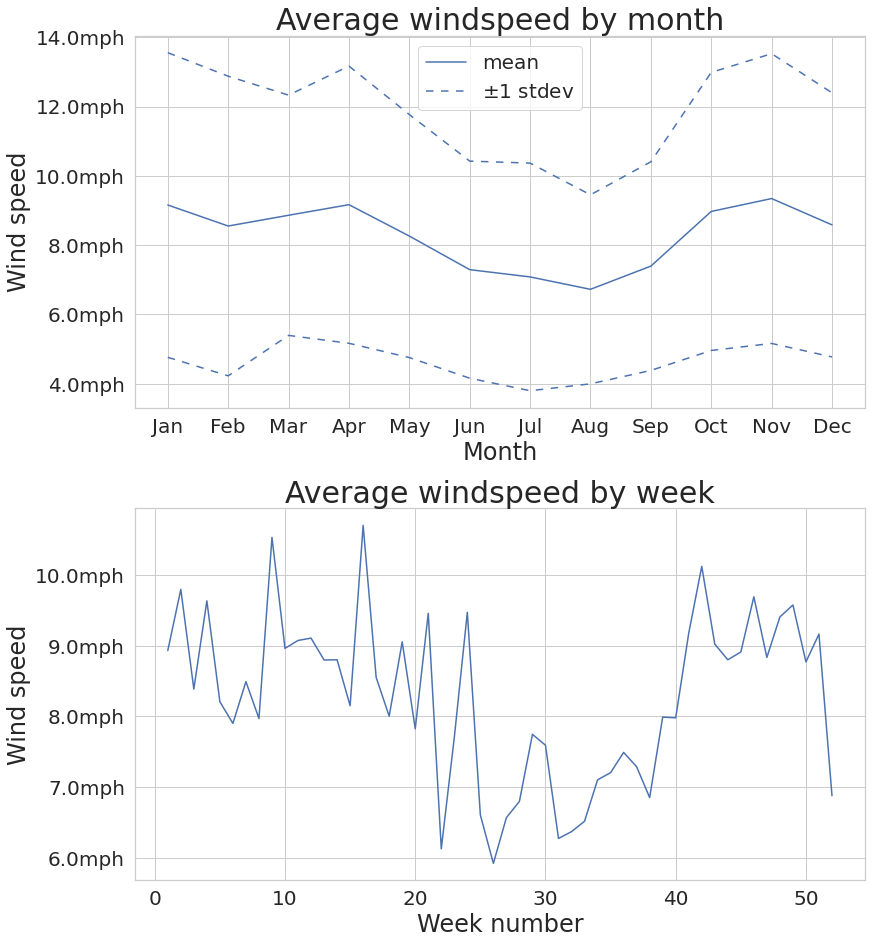

In [38]:
with sns.axes_style('whitegrid'):
  windspeed_nyc = df_weather.loc[nyc].reset_index(drop=True)
  fig, (ax1, ax2) = plt.subplots(2, figsize=(12,13), constrained_layout=True)

  monthly_windspeed_nyc = windspeed_nyc.groupby(windspeed_nyc['date'].dt.month).mean()
  monthly_windspeed_std_nyc = windspeed_nyc.groupby(windspeed_nyc['date'].dt.month).std()

  sns.lineplot(x=monthly_windspeed_nyc.index, y=monthly_windspeed_nyc['windSpeed'], ax=ax1, label='mean')
  sns.lineplot(x=monthly_windspeed_nyc.index, y=monthly_windspeed_nyc['windSpeed']+monthly_windspeed_std_nyc['windSpeed'],\
              ax=ax1, color='b')
  sns.lineplot(x=monthly_windspeed_nyc.index, y=monthly_windspeed_nyc['windSpeed']-monthly_windspeed_std_nyc['windSpeed'],\
              ax=ax1, color='b')

  ax1.set_title('Average windspeed by month')
  ax1.set_xlabel('Month')
  ax1.set_ylabel('Wind speed')

  [element.set_dashes((5,5)) for element in ax1.lines[-2:]]

  ax1.legend(['mean', r'$\pm$1 stdev'])

  ax1.set_xticks(np.arange(1,13,1))
  ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
  # ax2.set_yticks(np.arange(0,21,5))
  ax1.set_yticklabels([f'{element}mph' for element in ax1.get_yticks()])

  weekly_windspeed_nyc = windspeed_nyc.groupby(windspeed_nyc['date'].dt.week).mean()

  sns.lineplot(x=weekly_windspeed_nyc.index, y=weekly_windspeed_nyc['windSpeed'], ax=ax2)

  ax2.set_title('Average windspeed by week')
  ax2.set_xlabel('Week number')
  ax2.set_ylabel('Wind speed')
  ax2.set_yticklabels([f'{element}mph' for element in ax2.get_yticks()])
  None

If we look at a monthly and weekly average of wind speeds, we see that the fall and winter months have higher wind speeds on average. This is likely because there are more storms (rainstorms, thunderstorms, snowstorms, blizzards, etc.) during these months, and storms bring a lot more wind. Clear days and nice weather are usually not accompanied by wind.

We can also see that windspeed, like precipitation, has a lot of variability, since the week and month curves don't overlap very well. This causes a very high standard deviation, as you can see on the graph with the dashed lines.

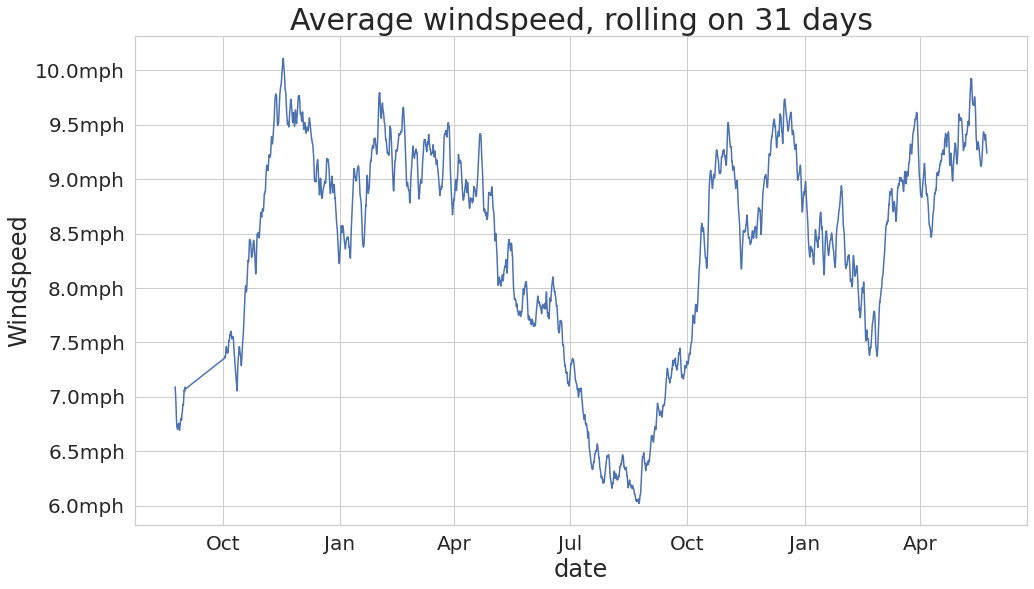

In [39]:
with sns.axes_style('whitegrid'):
  moving_average_nyc = df_weather.loc[nyc, 'windSpeed'].rolling(24*31)


  # plt.figure(figsize=(16,9))
  ax = sns.lineplot(x=df_weather.loc[nyc, 'date'], y=moving_average_nyc.mean())
  # ax = sns.lineplot(x=df_weather.loc[nyc, 'date'], y=moving_average_nyc.mean() + moving_average_nyc.std(), color='b')
  # ax = sns.lineplot(x=df_weather.loc[nyc, 'date'], y=moving_average_nyc.mean() - moving_average_nyc.std(), color='b')

  ax.set_title('Average windspeed, rolling on 31 days')
  ax.set_xticklabels([f'{pd.to_datetime(element-DAYS_SINCE_0, unit="D").strftime("%b")}' for element in ax.get_xticks()])
  ax.set_yticklabels([f'{element}mph' for element in ax.get_yticks()])
  ax.set_ylabel('Windspeed')

  # [element.set_dashes((5,5)) for element in ax.lines[-2:]]

  # ax.legend(['mean', r'$\pm$1 stdev'])

Rolling averages of wind speed seem to follow a similar pattern of higher wind speeds in colder months. This graph helps us see the change in windspeed over longer periods of time, since it displays almost 2 years worth of data, rather than just one. There are some small deviations - December 2018 was higher than December 2019 and March 2018 was higher than March 2019 - but for the most part, the windspeed has not changed significantly over the two years.

## NYC - Humidity Analysis

[Text(1, 0, '0.0%'),
 Text(2, 0, '10.0%'),
 Text(3, 0, '20.0%'),
 Text(4, 0, '30.0%'),
 Text(5, 0, '40.0%'),
 Text(6, 0, '50.0%'),
 Text(7, 0, '60.0%'),
 Text(8, 0, '70.0%'),
 Text(9, 0, '80.0%'),
 Text(10, 0, '90.0%')]

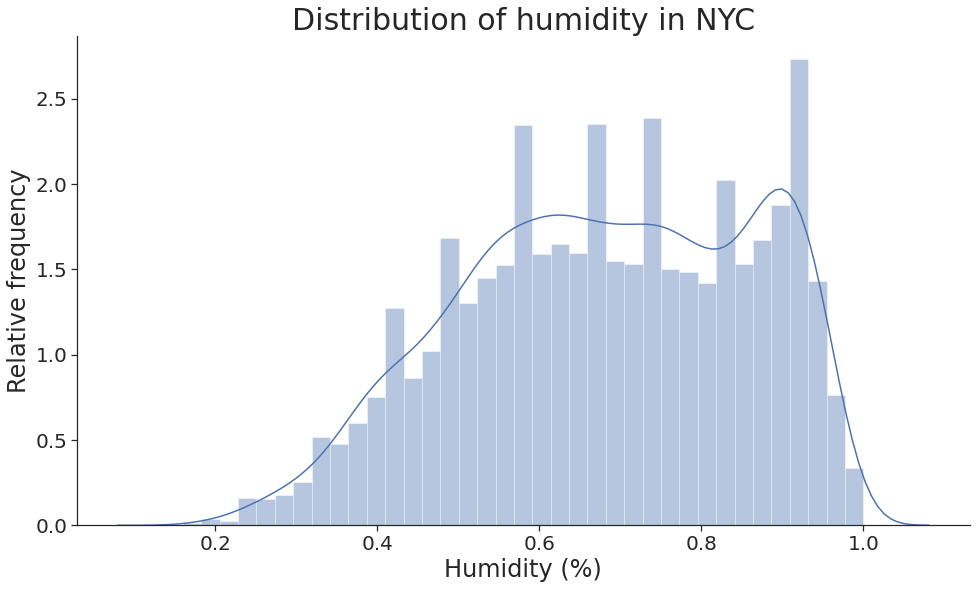

In [40]:
ax = sns.distplot(df_weather.loc[nyc,'humidity'],norm_hist=True)

ax.set_title('Distribution of humidity in NYC')
ax.set_xlabel('Humidity (%)')
ax.set_ylabel('Relative frequency')
ax1.set_xticks(np.arange(0, 100, 10))
ax1.set_xticklabels([f'{element:0.1f}%' for element in ax1.get_xticks()])

The range in humidity varies greatly in New York City, presumably because of the wide range of weather the location experiences. The graph is heavily skewed left, which means on average NYC experiences high humidity with a few dry days in between. This is pretty in line with our research and general knowledge of NYC.

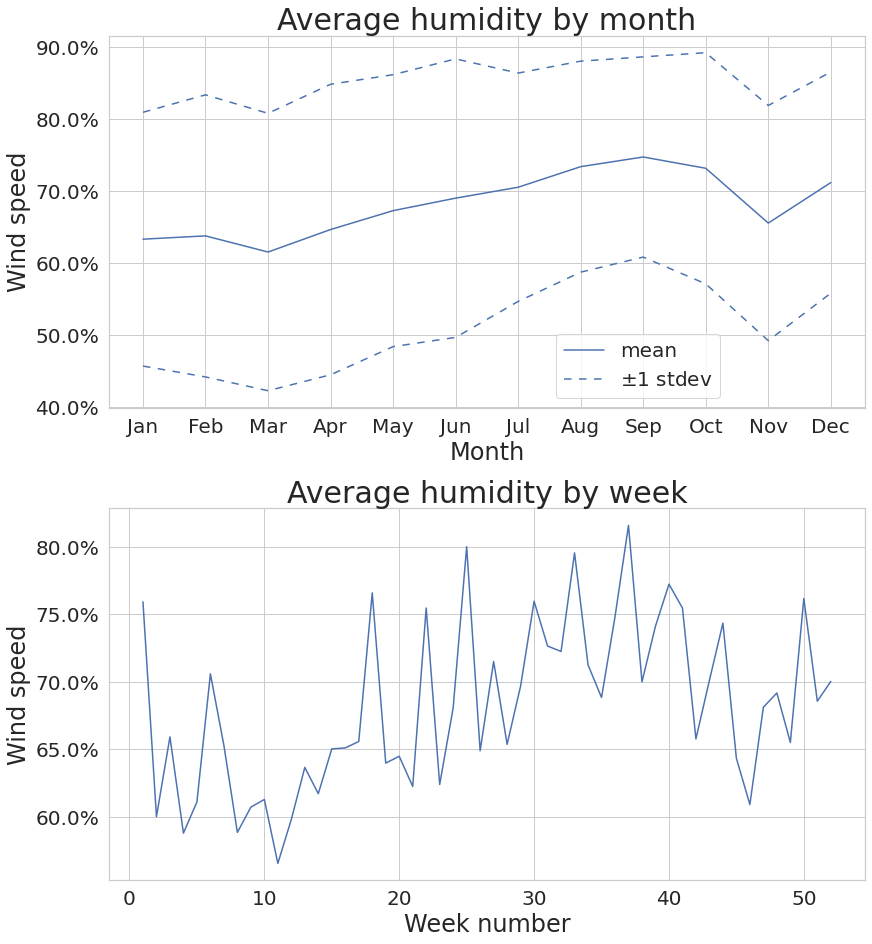

In [41]:
with sns.axes_style('whitegrid'):
  humidity_nyc = df_weather.loc[nyc].reset_index(drop=True)
  fig, (ax1, ax2) = plt.subplots(2, figsize=(12,13), constrained_layout=True)

  monthly_humidity_nyc = humidity_nyc.groupby(humidity_nyc['date'].dt.month).mean()
  monthly_humidity_std_nyc = humidity_nyc.groupby(humidity_nyc['date'].dt.month).std()

  sns.lineplot(x=monthly_humidity_nyc.index, y=monthly_humidity_nyc['humidity'], ax=ax1, label='mean')
  sns.lineplot(x=monthly_humidity_nyc.index, y=(monthly_humidity_nyc['humidity']+monthly_humidity_std_nyc['humidity']),\
              ax=ax1, color='b')
  sns.lineplot(x=monthly_humidity_nyc.index, y=(monthly_humidity_nyc['humidity']-monthly_humidity_std_nyc['humidity']),\
              ax=ax1, color='b')

  ax1.set_title('Average humidity by month')
  ax1.set_xlabel('Month')
  ax1.set_ylabel('Wind speed')

  ax1.set_xticks(np.arange(1,13,1))
  ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
  # ax2.set_yticks(np.arange(0,21,5))
  ax1.set_yticklabels(percents(ax1.get_yticks()))

  [element.set_dashes((5,5)) for element in ax1.lines[-2:]]

  ax1.legend(['mean', r'$\pm$1 stdev'], loc='lower center', bbox_to_anchor=(0.7,0))

  weekly_humidity_nyc = humidity_nyc.groupby(humidity_nyc['date'].dt.week).mean()

  sns.lineplot(x=weekly_humidity_nyc.index, y=weekly_humidity_nyc['humidity'], ax=ax2)

  ax2.set_title('Average humidity by week')
  ax2.set_xlabel('Week number')
  ax2.set_ylabel('Wind speed')
  ax2.set_yticklabels(percents(ax2.get_yticks()))
  None

The average humidity within New York City varies greatly from week to week but overall seems to peak in late summer and early fall months. This is pretty inline with what we already know from research and past knowledge - NYC summer and autumn are hot and humid. 

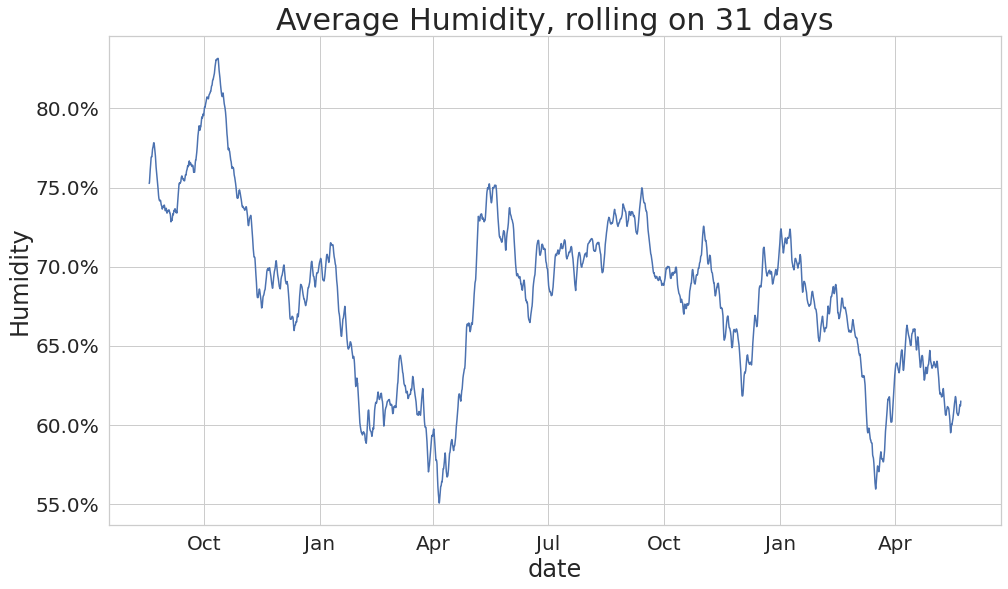

In [42]:
with sns.axes_style('whitegrid'):
  moving_average_nyc = df_weather.loc[nyc, 'humidity'].rolling(24*31)

  # plt.figure(figsize=(16,9))
  ax = sns.lineplot(x=df_weather.loc[nyc, 'date'], y=moving_average_nyc.mean())
  # ax = sns.lineplot(x=df_weather.loc[nyc, 'date'], y=(moving_average_nyc.mean() + moving_average_nyc.std()), color='b')
  # ax = sns.lineplot(x=df_weather.loc[nyc, 'date'], y=(moving_average_nyc.mean() - moving_average_nyc.std()), color='b')
  ax.set_title('Average Humidity, rolling on 31 days')
  ax.set_xticklabels([f'{pd.to_datetime(element-DAYS_SINCE_0, unit="D").strftime("%b")}' for element in ax.get_xticks()])
  ax.set_yticklabels(percents(ax.get_yticks()))
  ax.set_ylabel('Humidity')

  # [element.set_dashes((5,5)) for element in ax.lines[-2:]]

  # ax.legend(['mean', r'$\pm$1 stdev'])

The rolling average reveals trends across years. The most noticable is that humidity dropped significantly between 2018 and 2019, with 2018 October/November humidity reaching an average of over 80%, whereas humidity was barely 60% a year later in 2019.

## NYC - Weather Patterns

In [43]:
df_weather[nyc].pivot_table(index='icon', \
                            values=['temperature', 'precipProbability', 'windSpeed', 'humidity'], aggfunc=np.mean)

humidity  precipProbability  temperature  windSpeed
icon                                                                    
clear-day            0.531932           0.015152    60.172690   8.515869
clear-night          0.627643           0.007996    50.430353   7.418903
cloudy               0.808810           0.065160    54.608610   8.081729
fog                  0.830000           0.200000    42.023333   6.016667
partly-cloudy-day    0.639899           0.032353    58.866492   8.905534
partly-cloudy-night  0.719005           0.025671    51.728515   7.610417
rain                 0.890224           0.581057    55.004354   9.831786
snow                 0.871000           0.477375    31.540875  10.068250
wind                 0.602800           0.059200    41.132000  22.463200

Looking at this Pivot-Table, we can get a rough idea that `temperature`, `windSpeed`, and `precipProbability` have different patterns depending on the overall weather pattern (represented by `icon`). We also see that there's a separation of day and night weather. For our EDA, we're going to focus on day only to be consistent. We're also going to exclude the `fog` category because we aren't using fog in our primary data analysis.

Let's use a couple of graphs to see this in a more visual format to improve our understanding. 

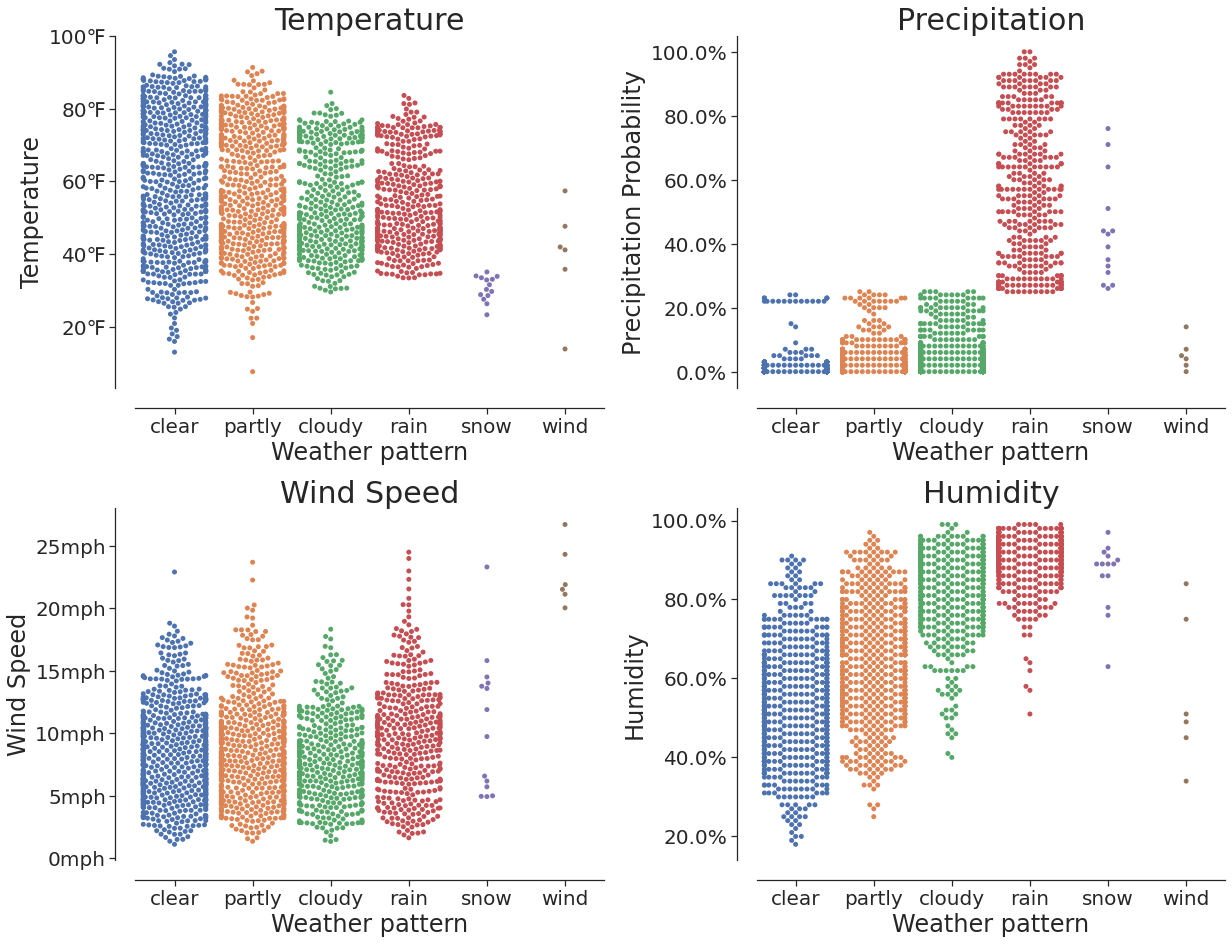

In [44]:
nyc_icons = df_weather[nyc & (~df_weather['icon'].isin(['partly-cloudy-night', 'clear-night', 'fog']))]
temp = nyc_icons.groupby('icon')[['temperature', 'windSpeed', 'precipProbability', 'humidity']].mean()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(17,13), constrained_layout=True)
sns.despine(offset=20)
col_names = {'clear-day': 'clear', 'cloudy': 'cloudy', 'partly-cloudy-day': 'partly', 'rain':'rain', 'snow':'snow', 'wind':'wind'}
palette = {'clear-day': 'm', 'cloudy': 'b', 'partly-cloudy-day': 'g', 'rain':'r', 'snow':'c', 'wind':'y'}

temp = temp.sort_values(by='temperature', ascending=False)

sns.swarmplot(data=nyc_icons[::5], x='icon', y='temperature', ax=ax1)
ax1.set_title('Temperature')
ax1.set_xticklabels([col_names[element.get_text()] for element in ax1.get_xticklabels()])
ax1.set_xlabel('Weather pattern')
ax1.set_ylabel('Temperature')
ax1.set_yticklabels(degrees(ax1.get_yticks()))

temp = temp.sort_values(by='precipProbability', ascending=False)
sns.swarmplot(data=nyc_icons[::5], x='icon', y='precipProbability', ax=ax2)
ax2.set_title('Precipitation')
ax2.set_xticklabels([col_names[element.get_text()] for element in ax2.get_xticklabels()])
ax2.set_xlabel('Weather pattern')
ax2.set_ylabel('Precipitation Probability') 
ax2.set_yticklabels(percents(ax2.get_yticks()))

temp = temp.sort_values(by='windSpeed', ascending=False)
sns.swarmplot(data=nyc_icons[::5], x='icon', y='windSpeed', ax=ax3)
ax3.set_title('Wind Speed')
ax3.set_xticklabels([col_names[element.get_text()] for element in ax3.get_xticklabels()])
ax3.set_xlabel('Weather pattern')
ax3.set_ylabel('Wind Speed') 
ax3.set_yticklabels([f'{element:.0f}mph' for element in ax3.get_yticks()])


temp = temp.sort_values(by='humidity', ascending=False)
ax4.set_title('Humidity')
sns.swarmplot(data=nyc_icons[::5], x='icon', y='humidity', ax=ax4)
ax4.set_xticklabels([col_names[element.get_text()] for element in ax4.get_xticklabels()])
ax4.set_xlabel('Weather pattern')
ax4.set_ylabel('Humidity') 
ax4.set_yticklabels(percents(ax4.get_yticks()))

None

These swarmplots plots the distribution of different weather phenomena grouped by weather pattern. We can also see how the distribution for a specific weather pattern compares to the other distributions for a specific weather phenomena like temperature or precipitation.

There's a lot of charts going on, but the results are actually quite simple and make a lot of sense: 

* Clear and partly cloudy weather patterns experience a wider ranger of temperatures than cloudy and rainy patterns. Snow only forms between 20 and 35 degrees. 

* Precipitation is highest with rain and snow, and lowest with clear weather.

* Windspeeds are relatively consistent throughout, but slightly higher with rain and snow. This makes sense since rain and snow often bring storms, and storms have higher windspeeds. We did expect these windspeeds to be more distinctly different however. It is slightly surprising that the windspeeds are so similar.

* Humidity is highest during rain and cloudy weather, and lowest during wind, which makes sense because windy weather patterns are usually quite dry.

Let's take a look at how the distribution of weather patterns is impacted by the time of year.

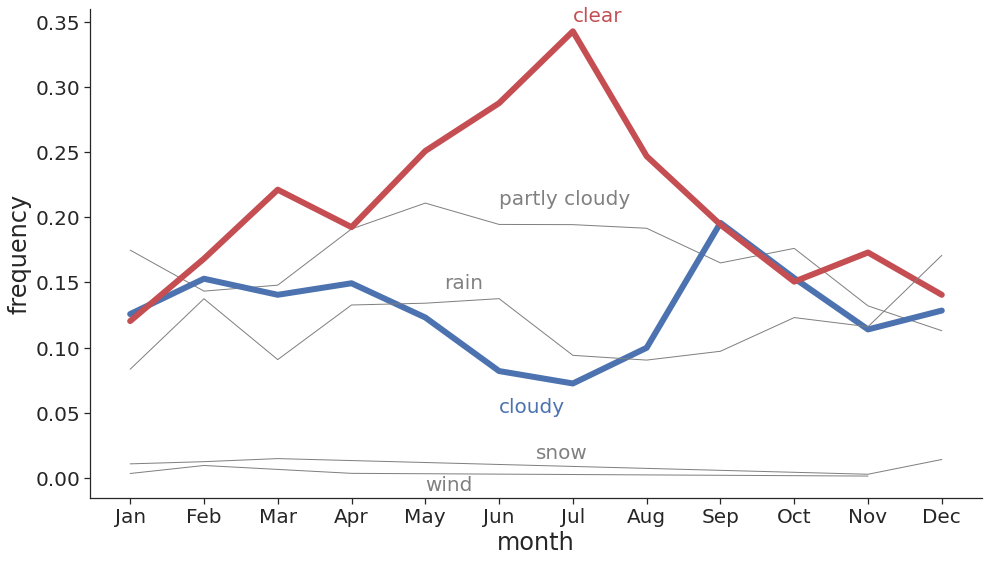

In [45]:
weather_patterns = df_weather[nyc].groupby(df_weather.loc[nyc, 'date'].dt.month).apply(lambda x: x['icon'].value_counts(normalize=True))

weather_patterns = weather_patterns.loc[:,['clear-day', 'partly-cloudy-day', 'cloudy', 'rain', 'snow', 'wind']].reset_index('date')
weather_patterns.columns = ['month', 'frequency']
weather_patterns = weather_patterns.reset_index()
weather_patterns.columns = ['icon', 'month', 'frequency']
icon_replacements = {'clear-day': 'clear', 'cloudy': 'cloudy', 'partly-cloudy-day': 'partly', 'rain':'rain', 'snow':'snow', 'wind':'wind'}

weather_patterns = weather_patterns.replace(icon_replacements)

palette = {'clear': 'r', 'cloudy': 'b', 'partly': 'gray', 'rain':'gray', 'snow':'gray', 'wind':'gray'}
sizing = {'clear': 6, 'cloudy': 6, 'partly': 1, 'rain':1, 'snow':1, 'wind':1}

ax = sns.lineplot(data=weather_patterns, x='month', y='frequency', hue='icon', palette = palette, size='icon', sizes=sizing)
ax.set_title('')

ax.legend().remove()
ax.annotate('clear', (7,0.35), color='r')
ax.annotate('partly cloudy', (6,0.21), color='gray')
ax.annotate('cloudy', (6,0.05), color='b')
ax.annotate('rain', (5.25,0.145), color='gray')
ax.annotate('snow', (6.5,0.015), color='gray')
ax.annotate('wind', (5,-0.01), color='gray')


ax.set_xticks(np.arange(1,13,1))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
None

We use this line plot to demonstrate the trends for each weather pattern throughout the year. Each line illustrates a different weather pattern, as shown in the legend.

As expected, the distribution of features changes in conjunction with months.
For instance, the incidence of sunny days goes up during the summer while rainy days see a spike during winter time. We also observe a dip in the summer and a spike in the fall for cloudy days, as well as a small spike in the winter for snowy days.

These trends seem very reasonable and align with what we normally expect to see in each of these seasons.

Next, we'll take a look at relationships between the different features we have.

## Bivariate Relationships

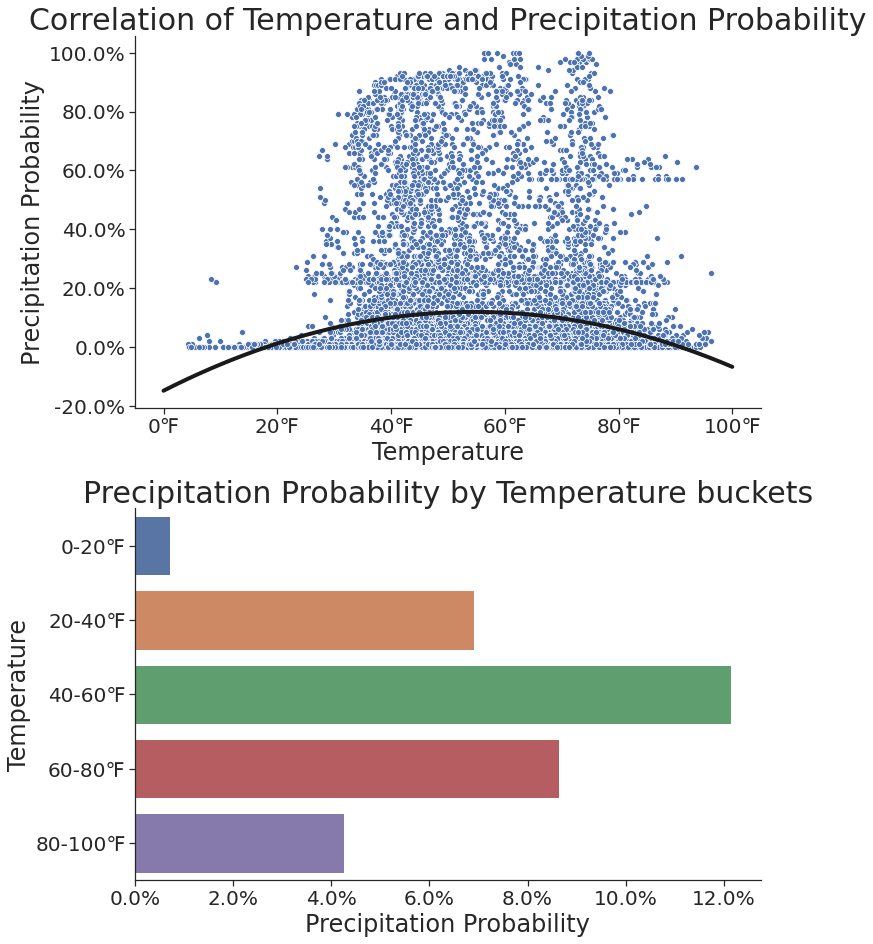

In [47]:
poly = np.polyfit(df_weather.loc[nyc, 'temperature'].fillna(0), \
                  df_weather.loc[nyc, 'precipProbability'].fillna(0), deg=2)

# plt.figure(figsize=(16,9))
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,13), constrained_layout=True)

sns.scatterplot(data=df_weather[nyc], x='temperature', y='precipProbability', ax=ax1)
ax1.plot(np.linspace(0,100), np.poly1d(poly)(np.linspace(0,100)), color='k', linewidth=4)

ax1.set_title('Correlation of Temperature and Precipitation Probability')
ax1.set_xlabel('Temperature')
ax1.set_ylabel('Precipitation Probability')

ax1.set_xticklabels(degrees(ax1.get_xticks()))
ax1.set_yticklabels(percents(ax1.get_yticks()))

sns.barplot(y=pd.cut(df_weather.loc[nyc,'temperature'], bins=[0, 20,40,60,80,100], labels=['0-20', '20-40', '40-60', '60-80', '80-100']), x=df_weather.loc[nyc,'precipProbability'], ci=None, ax=ax2)
ax2.set_title('Precipitation Probability by Temperature buckets')
ax2.set_xlabel('Precipitation Probability')
ax2.set_ylabel('Temperature')

ax2.set_xticklabels(percents(ax2.get_xticks()))
ax2.set_yticklabels([f'{element.get_text()}{DEGREE}' for element in ax2.get_yticklabels()])

None

At first glance, this scatterplot seems like a meaningless jumble of points, but it actually contains some valuable information. On average, precipitation is much more likely at average temperatures - as temperatures tend towards the extremes, the probability of precipitation drops off steeply. This makes sense since warm weather will not be conducive to rain (condensation happens at cooler temperatures). Additionally, our research found that snow and other icy precipitation do not occur at extremely cold temperatures because these phenomena require moisture in the air and extreme cold leads to low moisture.

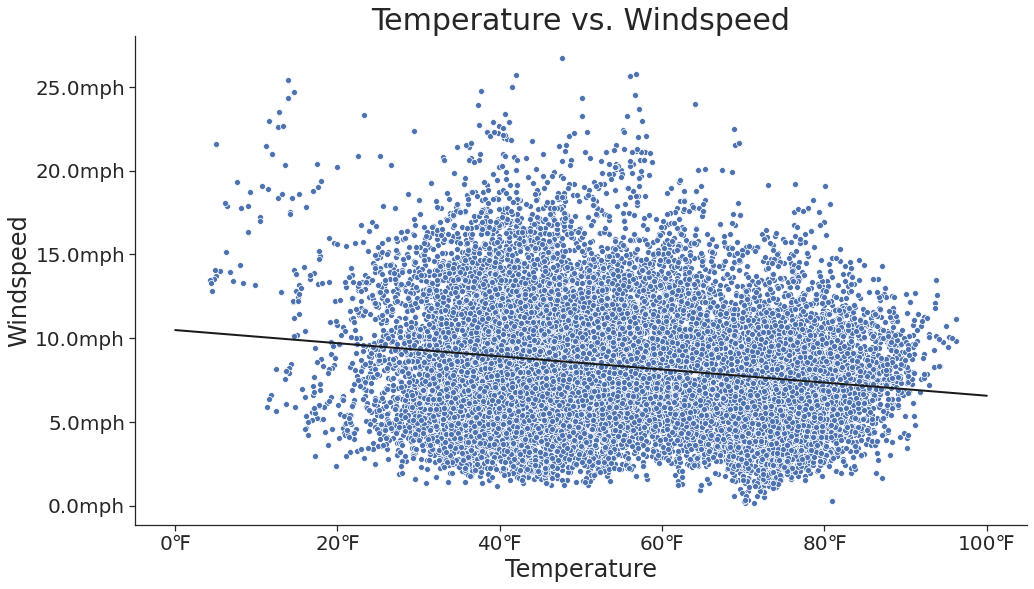

In [48]:
# plt.figure(figsize=(16,9))

ax = sns.scatterplot(data=df_weather[nyc], x='temperature', y='windSpeed')


poly = np.polyfit(df_weather.loc[nyc, 'temperature'].fillna(0), \
                  df_weather.loc[nyc, 'windSpeed'].fillna(0), deg=1)
ax.plot(np.linspace(0,100), np.poly1d(poly)(np.linspace(0,100)), color='k', linewidth=2)

ax.set_title('Temperature vs. Windspeed')
ax.set_xlabel('Temperature')
ax.set_ylabel('Windspeed')

ax.set_xticklabels(degrees(ax.get_xticks()))
ax.set_yticklabels([f'{element}mph' for element in ax.get_yticks()])

None

The line seems to indicate a slightly negative relationship but there is a high variance. This variance makes sense as we observe high windspeeds at both warmer and cooler temperatures in our daily lives. On the other hand, we also experience windless days, also on hot and cold days. For the most part, we usually feel like cold days are usually windier and warm days are more pleasant, and this is in line with our findings.

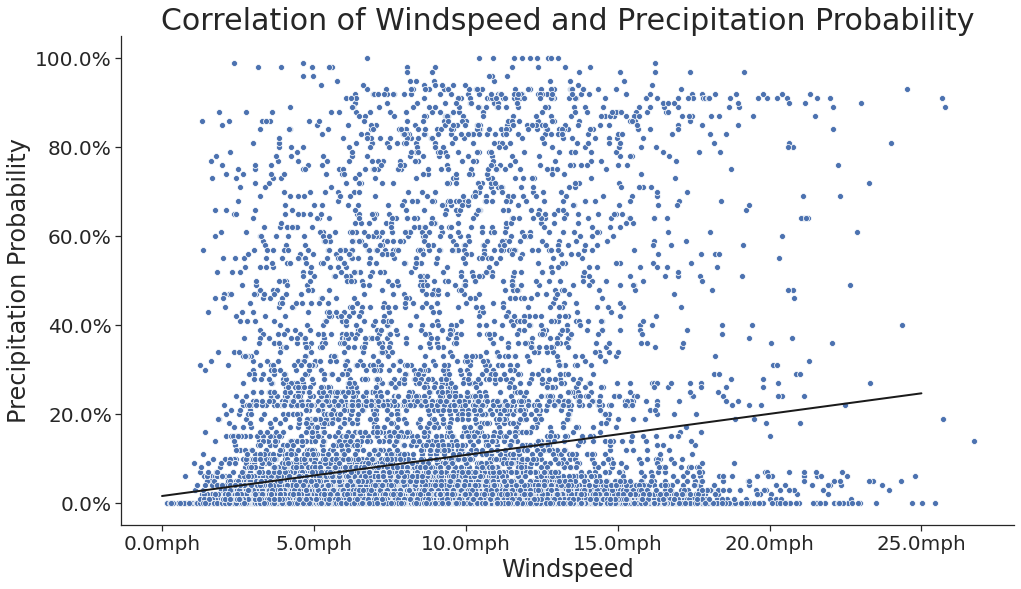

In [49]:
# plt.figure(figsize=(16,9)

ax = sns.scatterplot(data=df_weather[nyc], x='windSpeed', y='precipProbability')

poly = np.polyfit(df_weather.loc[nyc, 'windSpeed'].fillna(0), \
                  df_weather.loc[nyc, 'precipProbability'].fillna(0), deg=1)
ax.plot(np.linspace(0,25), np.poly1d(poly)(np.linspace(0,25)), color='k', linewidth=2)

ax.set_title('Correlation of Windspeed and Precipitation Probability')
ax.set_xlabel('Windspeed')
ax.set_ylabel('Precipitation Probability')

ax.set_xticklabels([f'{element}mph' for element in ax.get_xticks()])
ax.set_yticklabels(percents(ax.get_yticks()))

None

There seems to be a positive relationship between wind speed and chance of rain. This trend can possibly be explained by thunderstorms or snowstorms as these severe weather phenomena usually come with higher wind speeds.

precipIntensity is correlated with precipProbability and precipAccumulation
precipProbability is correlated with precipAccumulation and precipIntensity
temperature is correlated with apparentTemperature and dewPoint
apparentTemperature is correlated with temperature and dewPoint
dewPoint is correlated with temperature and apparentTemperature
humidity is correlated with cloudCover
windSpeed is correlated with windGust
windGust is correlated with windSpeed
cloudCover is correlated with humidity
visibility is correlated with precipAccumulation
precipAccumulation is correlated with precipProbability and precipIntensity and visibility


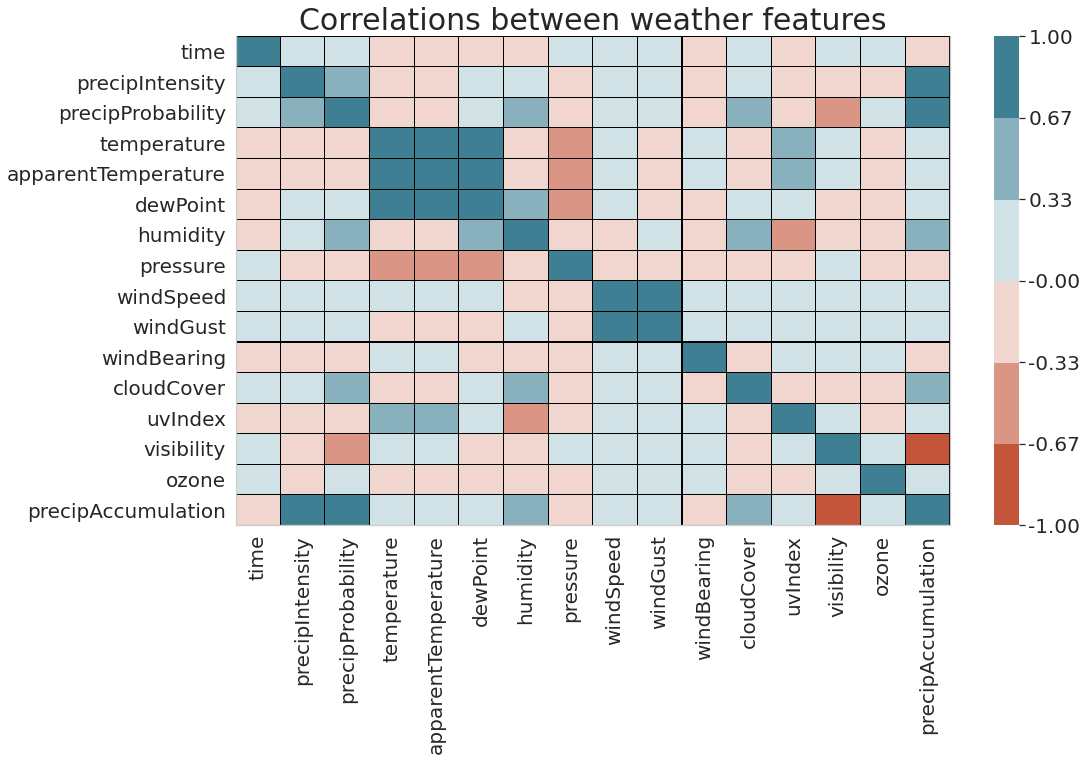

In [50]:
n=6

with sns.axes_style('whitegrid'):
  # plt.figure(figsize=(16,9))
  ax = sns.heatmap(df_weather.corr(), cmap=sns.diverging_palette(20, 220, n=n), vmin=-1, vmax=1, \
                  linecolor='black', linewidths=0.1)
  ax.set_title('Correlations between weather features')
  sns.despine(left=False, right=False)

  cbar = ax.collections[0].colorbar
  cbar.set_ticks(np.arange(-1,1.001,2/(n)))
  cbar.set_ticklabels([f'{element:0.2f}' for element in cbar.get_ticks()])

  corr = df_weather.corr()

  for col in corr.columns:
      s = set(corr[abs(corr.loc[col])>0.5].index)-(set([col]))
      if len(s) > 0:
          print(f'{col} is correlated with {" and ".join(s)}')

To observe the correlation between each of our various features, we have created a heatmap. The more solid the color, the stronger the correlation.

Some of these correlations are expected: `temperature` and `apparentTemperature` should be very similar. `precipIntensity`, `precipProbability`, and `precipAccumulation` should also be strongly correlated. Some of these other correlations are less obvious at first glance, such as `pressure` with `dewPoint` and `temperature` or `uvIndex` with `temperature` and `humidity` but not `cloudCover` or `ozone`.

This matrix does give us some critical insights: some of these features will be redundant, and do not need to all be included when building a model. Choosing which ones to keep and which ones to drop will require testing of performance with different combinations. 

With so many redundant features, it may be in our best interest to run PCA or another form of dimensionality reduction on our data. This will allow us to create new features that capture the information provided by related variables in a single feature, allowing us to keep information while elimintaing redundancy. This should speed up our model training time without impacting our accuracy too much.

## Cross City Analysis

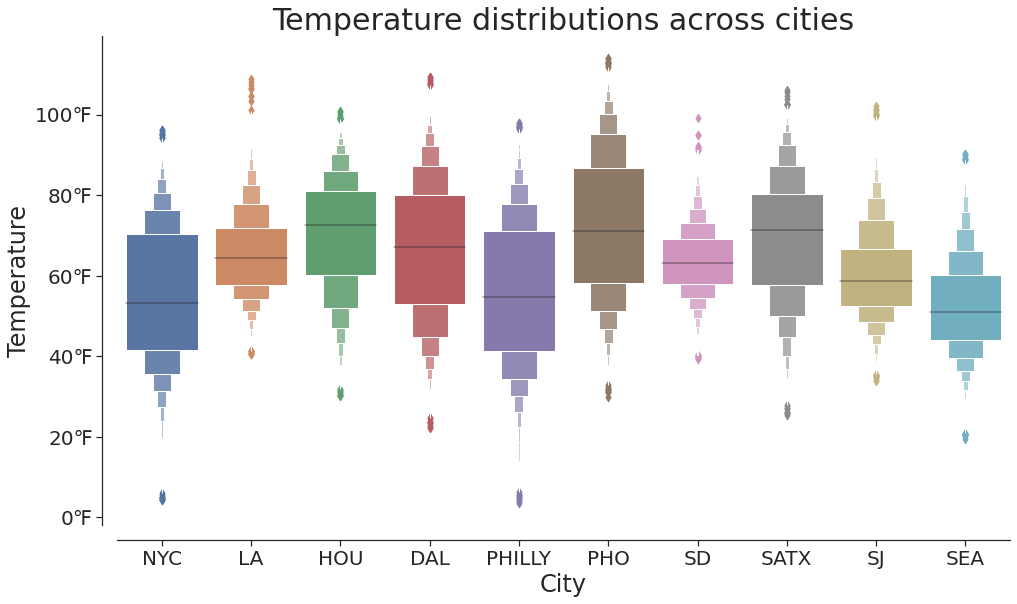

In [51]:
ax = sns.boxenplot(x='city',y='temperature',data=df_weather)
ax.set_title('Temperature distributions across cities')
ax.set_xticklabels(['NYC', 'LA', 'HOU', 'DAL', 'PHILLY', 'PHO', 'SD', 'SATX', 'SJ', 'SEA'])
ax.set_xlabel('City')
ax.set_ylabel('Temperature')
ax.set_yticklabels(degrees(ax.get_yticks()))
sns.despine(offset=15)
None


Here we create boxplots to illustrate the distribution of temperatures for the data, grouped by city. We see that every city's boxplot appears to be approximately symmetrical, and each plot has a couple outliers on either end of the distribution.

We also observe differences in spread; for instance, New York City and Philadelphia experience lower temperatures than cities like Los Angeles and Phoenix. This is expected as the latter two cities are much closer to the equator than the former. 

Furthermore, cities like LA and SD, which are closer to the coast, tend to have more moderate and consistent temperatures. This fact is reflected in their corresponding boxplots as these plots have a smaller spread and their mean temperature is moderate. Cities further inland like Phoenix have much wider spreads, since there is no large body of water to control the temperature and prevent large swings. 

However, NYC does not seem to follow this trend despite being right on the coast, as we can observe a very large spread in its boxplot above.

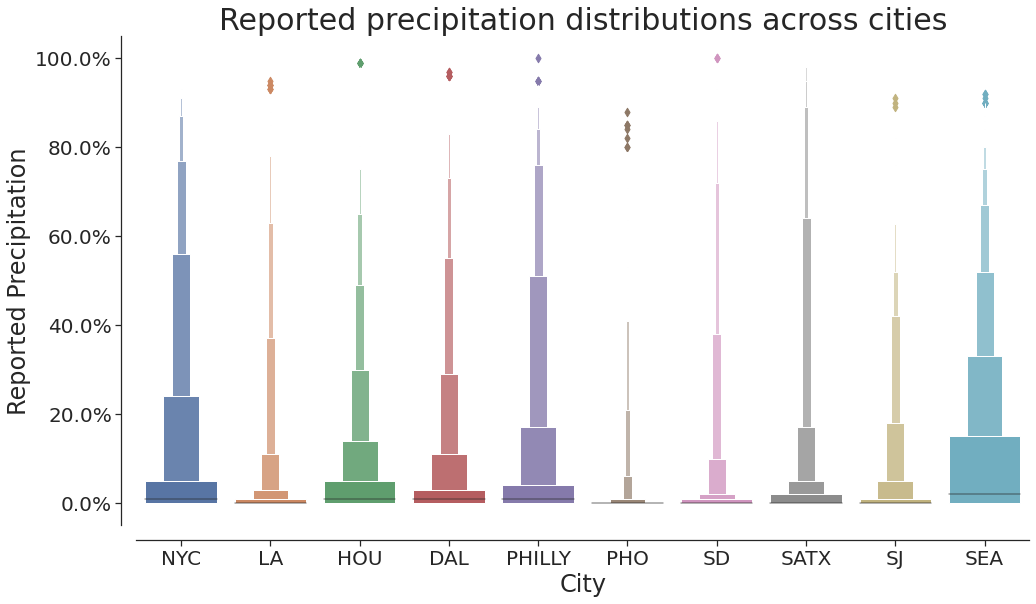

In [52]:
ax = sns.boxenplot(df_weather['city'],df_weather['precipProbability'])
ax.set_title('Reported precipitation distributions across cities')
ax.set_xticklabels(['NYC', 'LA', 'HOU', 'DAL', 'PHILLY', 'PHO', 'SD', 'SATX', 'SJ', 'SEA'])
ax.set_xlabel('City')
ax.set_ylabel('Reported Precipitation')
ax.set_yticklabels(percents(ax.get_yticks()))
sns.despine(offset=15)
None


The distributions appear to take on a similar shape with extreme skew towards small percentages. This trend makes sense since we usually experience way fewer rainy days than nonrainy; the plot is consistent with this fact in that the mean for each distribution is very close to zero percent.

Aditionally, Seattle and Philadelphia both have higher amounts of precipitation than the other cities. This is in line with our previous knowledge and research that suggests that Seattle and Philadelphia are more rainy than the average US city.

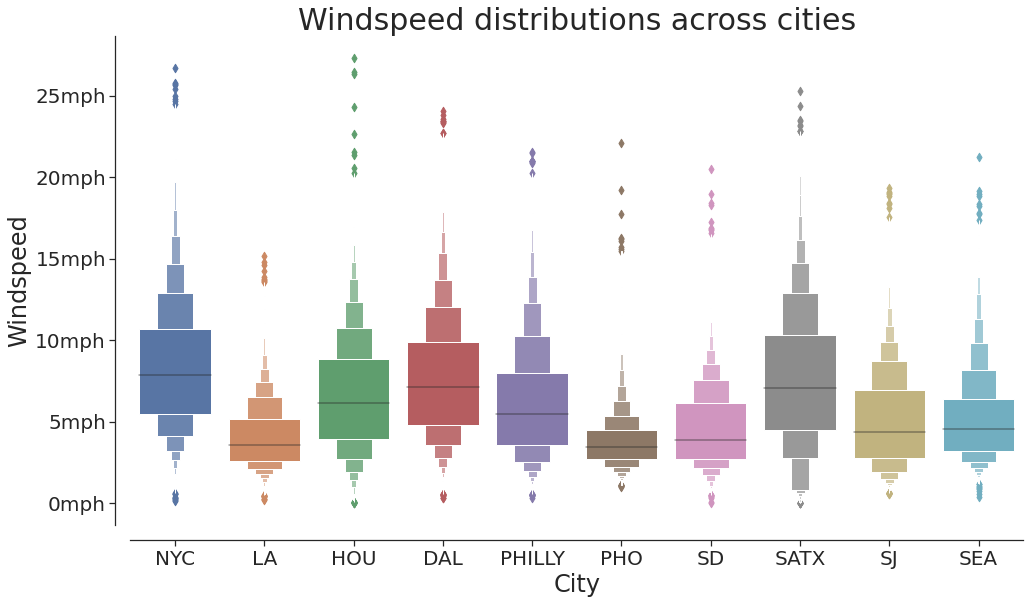

In [53]:
ax = sns.boxenplot(x='city',y='windSpeed',data=df_weather)
ax.set_title('Windspeed distributions across cities')
ax.set_xticklabels(['NYC', 'LA', 'HOU', 'DAL', 'PHILLY', 'PHO', 'SD', 'SATX', 'SJ', 'SEA'])
ax.set_xlabel('City')
ax.set_ylabel('Windspeed')
ax.set_yticklabels([f'{element:0.0f}mph' for element in ax.get_yticks()])
sns.despine(offset=15)
None

These boxplots vary much more in shape and spread compared to previous boxplots we have examined.

Some cities have a smaller spread, and some reach much higher speeds than others. Most of the boxplots look about symmetrical with a skew towards higher windspeeds. However, for the most part, there does not seem to be any obvious trend or relationship between city location and windspeed.

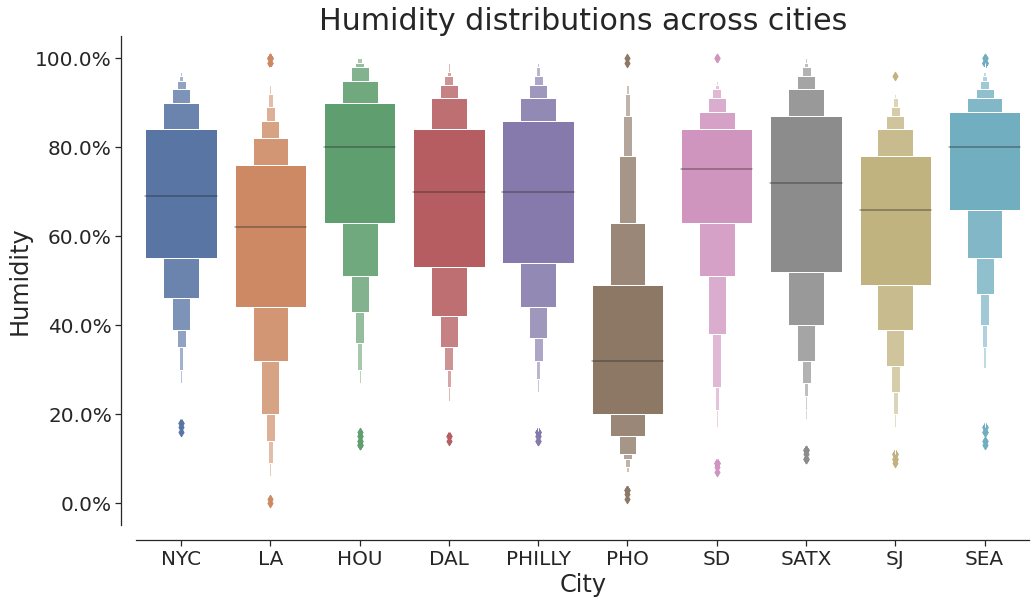

In [54]:
ax = sns.boxenplot(df_weather['city'],df_weather['humidity'])
ax.set_title('Humidity distributions across cities')
ax.set_xticklabels(['NYC', 'LA', 'HOU', 'DAL', 'PHILLY', 'PHO', 'SD', 'SATX', 'SJ', 'SEA'])
ax.set_xlabel('City')
ax.set_ylabel('Humidity')
ax.set_yticklabels((percents(ax.get_yticks())))
sns.despine(offset=15)
None


Many of the cities, like NYC, Houston, and Seattle have similar shapes and spreads. In fact, most of the cities have similarly large spreads of about an 80-90% difference between their maximum and minimum humidity. Also, most of the means lie in the range of 60% to 80%.

The city whose boxenplot differs most obviously is Phoenix; the mean humidity percentage for Phoenix is at least 30% lower than the mean for any other city. This distribution makes sense, though, because Phoenix is located in a desert; we reasonably expect the city to have a much drier climate than all the others.

Now that we've completed our exploratory analysis on weather data, let's take a look at some energy data.

## Energy Data

In [55]:
df1 = pd.read_csv('/content/drive/My Drive/data/cleaned_balance_data.csv')
df1['date'] = pd.to_datetime(df1['local_time'])

df2 = pd.read_csv('/content/drive/My Drive/data/cleaned_subregion_data.csv')
df2 = df2.drop(df2[df2['city'].isin(['dallas', 'houston', 'san antonio'])].index)
df2['date'] = pd.to_datetime(df2['local_time'])

df3 = pd.read_csv('/content/drive/My Drive/data/cleaned_texas_data.csv')

df3['date'] = pd.to_datetime(df3['date'])

df3 = df3.melt(id_vars=['date'], value_vars=['san antonio', 'houston', 'dallas'])

df3.columns = ['date', 'city', 'demand']

df3 = df3.drop(df3[(df3['date'] < pd.to_datetime('2018-07-01 00:00:00'))].index)

df_electric = pd.concat([df1, df2, df3])
df_electric.head(), df_electric['city'].unique()

(  company           local_time  ...                date  region
 0    AZPS  2018-07-01 01:00:00  ... 2018-07-01 01:00:00     NaN
 1    AZPS  2018-07-01 02:00:00  ... 2018-07-01 02:00:00     NaN
 2    AZPS  2018-07-01 03:00:00  ... 2018-07-01 03:00:00     NaN
 3    AZPS  2018-07-01 04:00:00  ... 2018-07-01 04:00:00     NaN
 4    AZPS  2018-07-01 05:00:00  ... 2018-07-01 05:00:00     NaN
 
 [5 rows x 7 columns],
 array(['phoenix', 'seattle', 'nyc', 'la', 'philadelphia', 'san diego',
        'san jose', 'san antonio', 'houston', 'dallas'], dtype=object))

In [56]:
df3

date         city    demand
4343  2018-07-01 01:00:00  san antonio   7630.92
4344  2018-07-01 02:00:00  san antonio   7092.31
4345  2018-07-01 03:00:00  san antonio   6714.32
4346  2018-07-01 04:00:00  san antonio   6421.05
4347  2018-07-01 05:00:00  san antonio   6246.61
...                   ...          ...       ...
61264 2020-04-30 20:00:00       dallas  13521.17
61265 2020-04-30 21:00:00       dallas  13149.45
61266 2020-04-30 22:00:00       dallas  12673.02
61267 2020-04-30 23:00:00       dallas  11653.34
61268 2020-04-30 00:00:00       dallas  10505.68

[48240 rows x 3 columns]

In [0]:
# df1 = pd.read_csv('data/cleaned_subregion_data.csv')
# df1['date'] = pd.to_datetime(df1['local_time'])

# df2 = pd.read_csv('data/cleaned_balance_data.csv')
# df2 = df2.drop(df2[df2['city'].isin(['dallas', 'houston', 'san antonio'])].index)
# df2['date'] = pd.to_datetime(df2['local_time'])

# df3 = pd.read_csv('data/cleaned_texas_data.csv')

# df3['date'] = pd.to_datetime(df3['date'])

# df3 = df3.melt(id_vars=['date'], value_vars=['san antonio', 'houston', 'dallas'])

# df3.columns = ['date', 'city', 'demand']

# df3 = df3.drop(df3[(df3['date'] < pd.to_datetime('2018-07-01 00:00:00'))].index)

# df_electric = pd.concat([df1, df2])
# df_electric.head()

We used population data to scale our demand to ensure that we are comparing relative demand between cities. That way, we can avoid exploring the confounding variable of population and more throughly explore the impact of weather on demand.

In [0]:
population = {
    'nyc': 8399000,
    'la': 3990000,
    'phoenix': 1660000,
    'seattle': 744955,
    'philadelphia': 1584000,
    'san antonio': 1493000,
    'san jose': 1030000,
    'houston': 2310000,
    'dallas': 1345000,
    'san diego': 1426000
             }

df_electric['demand_per_capita'] = df_electric['demand']/df_electric['city'].map(population)

Text(0.5, 1.0, 'Distribution of Demand in NYC')

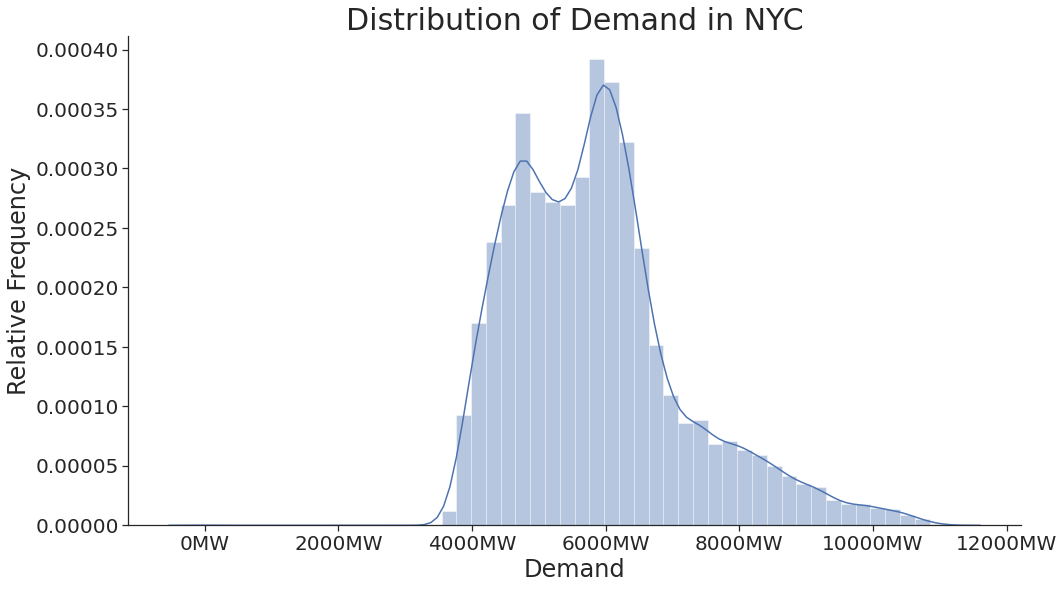

In [59]:
 # plt.figure(figsize=(16,9))
nyc = (df_electric['city'] == 'nyc')
ax = sns.distplot(df_electric.loc[nyc, 'demand'])
ax.set_xlabel('Demand')
ax.set_xticklabels([f'{element:.0f}MW' for element in ax.get_xticks()])
ax.set_ylabel('Relative Frequency')
ax.set_title('Distribution of Demand in NYC')

From this graph of NYC's energy consumption, we can see that demand has this interesting bimodality. Let's try and figure out why this is. We're going to start by testing the different seasons.

Text(0.5, 1.0, 'Distribution of Demand in NYC')

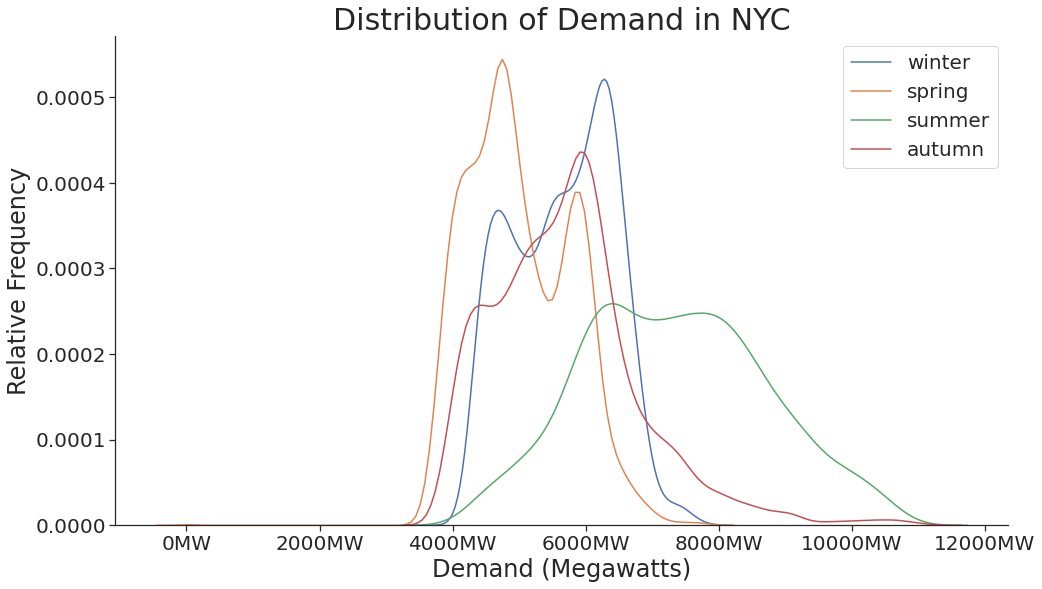

In [60]:
winter = (df_electric['date'].dt.month >= 12) | (df_electric['date'].dt.month < 3) # December, January February
spring = (df_electric['date'].dt.month >= 3) & (df_electric['date'].dt.month < 6) # March, April, May
summer = (df_electric['date'].dt.month >= 6) & (df_electric['date'].dt.month < 9) # June, July, August
autumn = (df_electric['date'].dt.month >= 9) & (df_electric['date'].dt.month < 12) # September, October, November

# figure = plt.figure(figsize=(16,9))

ax = sns.kdeplot(df_electric[winter & nyc]['demand'], label='winter')
ax = sns.kdeplot(df_electric[spring & nyc]['demand'], label='spring')
ax = sns.kdeplot(df_electric[summer & nyc]['demand'], label='summer')
ax = sns.kdeplot(df_electric[autumn & nyc]['demand'], label='autumn')

ax.set_xlabel('Demand (Megawatts)')
ax.set_xticklabels([f'{element:.0f}MW' for element in ax.get_xticks()])
ax.set_ylabel('Relative Frequency')
ax.set_title('Distribution of Demand in NYC')

This plot maps trends of energy in NYC, but split by season. 

We see that there is higher demand of energy in summer, as the green line is shifted more to the right than most of the other lines. This is probably due to increased usage of air conditioning units during the hot weather.

We notice that the right peak we saw in the previous plot is represented by the line plotting energy demand in winter. This is most likely a result of usage of heating units.

The left peak we saw in the previous plot is represented by the line plotting energy consumption in spring. The slight decrease in demand relative to other seasons is likely because spring is one of the seasons with the most comfortable weather, and thus there is less of a need for temperature regulating units.

Finally, we see that energy consumption in autumn is relatively average compared to the rest of the seasons. Like spring, autumn is usually moderate in terms of temperature, which leads to such observations.

Overall, these plots demonstrate what we would expect for energy consumption per season.

Text(0.5, 1.0, 'Distribution of Demand per City')

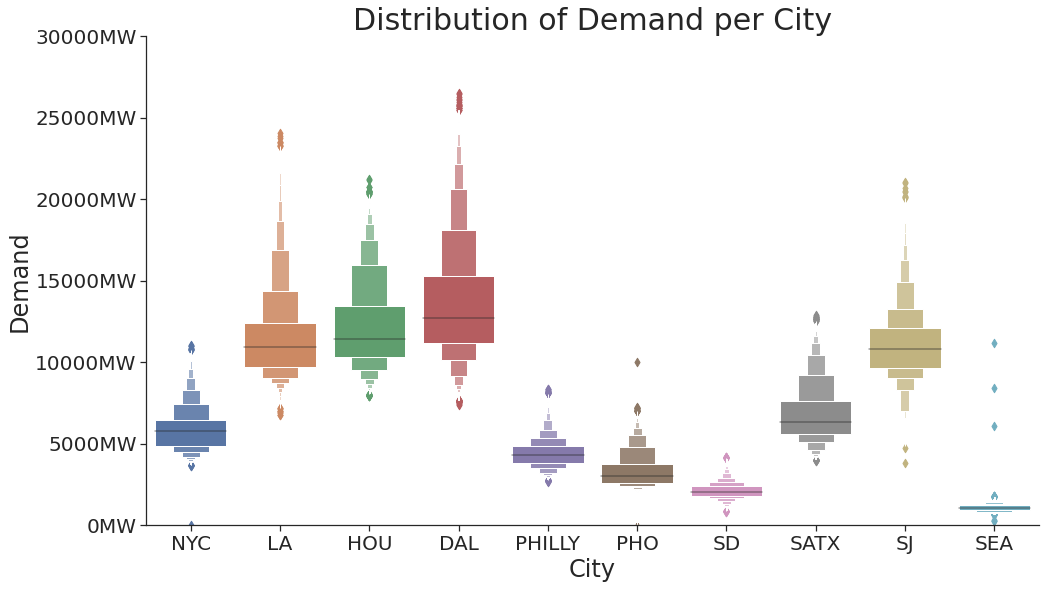

In [103]:
ax = sns.boxenplot(x='city',y='demand',data=df_electric, order=['nyc', 'la', 'houston', 'dallas', 'philadelphia', 'phoenix', 'san diego', 'san antonio', 'san jose', 'seattle'])
ax.set_xticklabels(['NYC', 'LA', 'HOU', 'DAL', 'PHILLY', 'PHO', 'SD', 'SATX', 'SJ', 'SEA'])
ax.set(ylim=(0, 30000))

ax.set_xlabel('City')
ax.set_ylabel('Demand')
ax.set_yticklabels([f'{element:.0f}MW' for element in ax.get_yticks()])
ax.set_title('Distribution of Demand per City')

These numbers look off at first glance, because we would expect NYC to have a much higher power consumption than any other city. However, after looking at public data from the City of New York, the numbers match the data from our dataset. King County published data on electricity consumption for the whole county in BTU. The hourly equivalent would be 2408 MW and since Seattle makes up a small subsection of King County, the relatively low power consumption makes sense in the data. 

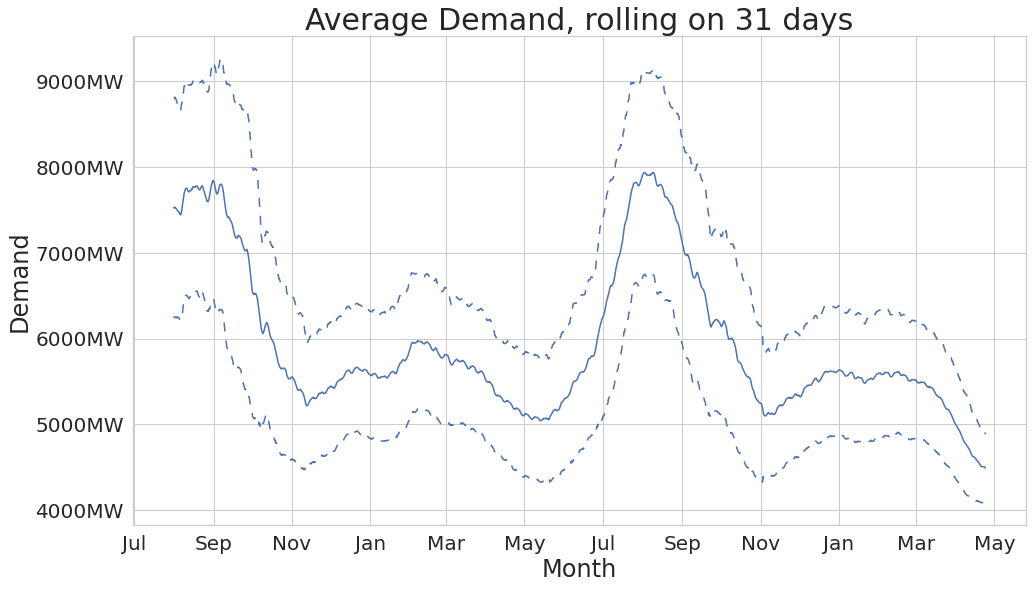

In [104]:
with sns.axes_style('whitegrid'):
  moving_average_nyc = df_electric.loc[nyc, 'demand'].rolling(24*31)


  # plt.figure(figsize=(16,9))
  ax = sns.lineplot(x=df_electric.loc[nyc, 'date'], y=moving_average_nyc.mean())
  ax = sns.lineplot(x=df_electric.loc[nyc, 'date'], y=moving_average_nyc.mean() + moving_average_nyc.std(), \
                    style=True, dashes=[(6,6)], color='b')
  ax = sns.lineplot(x=df_electric.loc[nyc, 'date'], y=moving_average_nyc.mean() - moving_average_nyc.std(), \
                    style=True, dashes=[(6,6)], color='b')

  ax.set_title('Average Demand, rolling on 31 days')
  ax.set_xlabel('Month')
  ax.set_ylabel('Demand')
  ax.set_xticklabels([f'{pd.to_datetime(element-DAYS_SINCE_0, unit="D").strftime("%b")}' for element in ax.get_xticks()])
  ax.set_yticklabels([f'{element:.0f}MW' for element in ax.get_yticks()])

  ax.legend().remove()


Here we have plotted the rolling average of energy demand, representing about 2 years worth of data. 

We can clearly see that there is a spike in energy consumption in the summer months around July to September. This makes sense because people use air conditioning units in hot weather more often than heating units in cold weather. 

Now that we have investigated some of the trends in our energy data in relation to season, city, and time of the year, we will move onto predictive data analysis.

# Predictive Data Analysis

## Feature reduction by Principal Component Analysis

In [0]:
df = df_electric.merge(df_weather, on=['city', 'date'])


The first thing that we notice is that we have a lot of features, and we have no idea which features are actually important to our analysis. To address this, we will start with some feature reduction to extrapolate the most important features. 

In [64]:
pca_ready_data = df[['temperature', 'precipProbability', 'windGust', 'windSpeed']]
imputer = SimpleImputer()
pca_ready_data = pd.DataFrame(imputer.fit_transform(pca_ready_data), columns = pca_ready_data.columns, index=pca_ready_data.index)
encoder = LabelEncoder()
# pca_ready_data['city'] = encoder.fit_transform(df['city'])
# pca_ready_data['icon'] = encoder.fit_transform(df['icon'].astype(str))
pca_ready_data['demand'] = imputer.fit_transform(df[['demand']])
pca_ready_data = pca_ready_data[pca_ready_data['demand'] < 50000]

pca = PCA(n_components=3)
principal_components = pca.fit_transform(pca_ready_data)

print(np.cumsum(pca.explained_variance_ratio_))

principal_df = pd.DataFrame(principal_components)

principal_df = principal_df.merge(df['demand'], left_index=True, right_index=True)
principal_df = principal_df.merge(df['icon'], left_index=True, right_index=True)
principal_df = principal_df.merge(df['city'], left_index=True, right_index=True)


# principal_df.columns = ['pc1', 'pc2', 'pc3', 'icon', 'city', 'demand']
principal_df.columns = ['pc1', 'pc2', 'pc3','demand','icon', 'city']

[0.99998746 0.99999762 0.99999989]


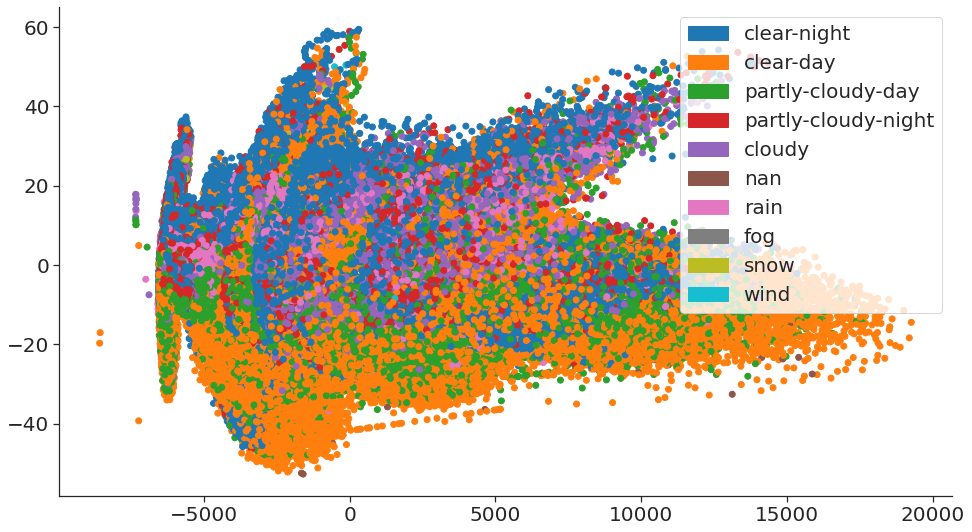

In [65]:
# ax = sns.scatterplot(data=principal_df, x='pc1', y='pc2', hue='icon')

fig = plt.figure()
ax = fig.add_subplot(111, projection=None)


leg_col = matplotlib.cm.tab10(list(range(10)))
list(leg_col)
colors = dict(zip(principal_df['icon'].unique(), leg_col ))
c = principal_df['icon'].apply(lambda x: colors[x])

ax.scatter(principal_df['pc1'], principal_df['pc2'], c=c, cmap='tab10')

patches = [mpatches.Patch(color=color, label='The red data') for color in leg_col]

ax.legend(patches, principal_df['icon'].unique())

While we can see some clustering, there's no clear cut groups that form. This is a hint to us that weather patterns may prove to be difficult to use to predict the energy consumption, but alas, we will try our best. Next, we will try organizing by city to evaluate the correlation. 

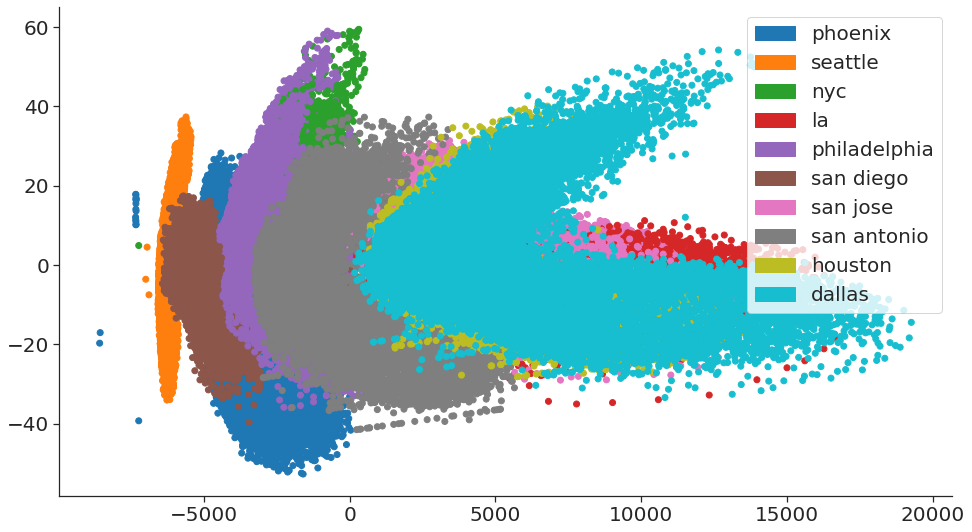

In [66]:
# ax = sns.scatterplot(data=principal_df, x='pc1', y='pc2', hue='icon')

fig = plt.figure()
ax = fig.add_subplot(111, projection=None)

leg_col = matplotlib.cm.tab10(list(range(10)))
list(leg_col)
colors = dict(zip(principal_df['city'].unique(), leg_col ))
c = principal_df['city'].apply(lambda x: colors[x])

ax.scatter(principal_df['pc1'], principal_df['pc2'], c=c, cmap='tab10')

patches = [mpatches.Patch(color=color, label='The red data') for color in leg_col]

ax.legend(patches, principal_df['city'].unique())

It becomes immediately clear that there is clustering between the city data points. This indicates that each city has it's own energy consumption patterns and will have a large impact as feature in the prediction model. Hopefully, we can still find a correlation between weather patterns and the energy consumption. For our prediction model, we will first try running linear regression. 

## Linear Regression


                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                 1.769e+04
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        04:58:22   Log-Likelihood:            -1.5766e+06
No. Observations:              160338   AIC:                         3.153e+06
Df Residuals:                  160336   BIC:                         3.153e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1291.0271     46.102     28.004      

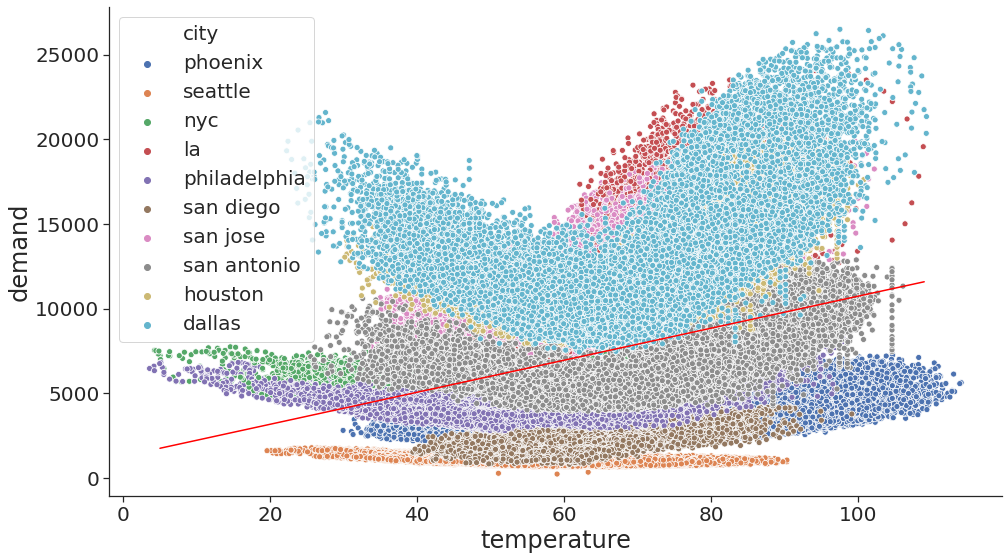

In [67]:
df_test = df[(df['demand'] < 100000) & (df['demand'] > 0)] # remove one outlier to see the graph better
df_test = df_test[df_test['temperature'].isna() != True] # remove nulls

outcomes_1, predictors_1 = patsy.dmatrices('demand ~ temperature',data=df_test)
model_1 = sm.OLS(outcomes_1, predictors_1)
res_1 = model_1.fit()
print(res_1.summary())

# Plotting the graph
ax = sns.scatterplot(x=df_test['temperature'],y=df_test['demand'],hue=df['city'])
a1, b1 = np.polyfit(df_test['temperature'], df_test['demand'], 1)

pred_demand = np.arange(5, 110, 1) * a1 + b1
ax.plot(np.arange(5, 110, 1), pred_demand, color = 'red')

We're starting with just temperature as our feature because we thought that it had the most correlation with energy consumption. We see that running linear regression with just temperature results in an $r^2$ value of .099, which is to be expected as we see that our data is far from linear. We thought that perhaps the difference in power consumption might be related to the size of the population, so we will run the same analysis, but with demand per capita.

In [68]:
outcomes_1, predictors_1 = patsy.dmatrices('demand_per_capita ~ temperature',data=df_test)
model_1 = sm.OLS(outcomes_1, predictors_1)
res_1 = model_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:      demand_per_capita   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     7721.
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        04:58:34   Log-Likelihood:             6.7739e+05
No. Observations:              160338   AIC:                        -1.355e+06
Df Residuals:                  160336   BIC:                        -1.355e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0011   3.62e-05     31.240      

We see that for some reason, this performs even worse. Next, we will try running regression with different degree polynomials and features to see which feature best describes the variance in the data. 

In [0]:
def run_regression(degree, features, summary=False, with_city = False):
  imputer = SimpleImputer()
  predictors = df[features]
  
  if with_city:
    predictors = pd.DataFrame(imputer.fit_transform(predictors), columns = predictors.columns, index=predictors.index)
  else:
    predictors = pd.DataFrame(imputer.fit_transform(predictors.to_numpy().reshape(-1,len(features))))
  
  outcome = df['demand']
  outcome = (pd.DataFrame(imputer.fit_transform(pd.DataFrame(outcome)))[0])
    
  # Add city 
  if with_city: 
    encoder = LabelEncoder()
    predictors['city'] = encoder.fit_transform(df['city'])

  # Summary
  if summary:
    polynomial_features= PolynomialFeatures(degree=degree)
    xp = polynomial_features.fit_transform(predictors)
    model = sm.OLS(outcome, xp).fit() 

    print(model.summary())

  # Prediction
  train_x, test_x, train_y, test_y = train_test_split(predictors, outcome)

  model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                    ('linear', LinearRegression(fit_intercept=False))])
  if with_city: 
    model = model.fit(train_x, train_y)
  else:
    model = model.fit(train_x.to_numpy().reshape(-1,len(features)), train_y)
  y_pred = model.predict(test_x)
  
  if with_city:
    train_r_squared = model.score(train_x, train_y)
    test_r_squared =  model.score(test_x, test_y)
  else:
    train_r_squared = model.score(train_x.to_numpy().reshape(-1,len(features)), train_y)
    test_r_squared = model.score(test_x.to_numpy().reshape(-1,len(features)), test_y)

  rMSE = mean_squared_error(test_y, y_pred, squared = False)
  return train_r_squared, test_r_squared, rMSE

This will be our main regression function. It will help us efficiently run regressions while having control over the degree of the polynomial that we want to fit to our model and which features we want to include. 

In [70]:
# Testing different degree polynomials for single features
max_test_r_squared = 0
best_degree = 0
best_feature = ''
features = ['precipProbability', 'pressure', 'temperature', 'windSpeed','windGust','humidity', 'cloudCover', 'visibility', 'dewPoint', 'windBearing', 'precipIntensity']
for feature in features:
  currentMax = 0
  currentIndex = 0
  for i in range(1, 10):
    _, current_R_squared, _ = run_regression(i, [feature])
    if (current_R_squared > max_test_r_squared):
      max_test_r_squared = current_R_squared
      best_degree = i
      best_feature = feature
    if current_R_squared > currentMax:
      currentMax = current_R_squared
      currentIndex = i
  print("The best testing R squared was:", currentMax, "with a degree of",  currentIndex, 'for', feature)

print("The overall best testing R squared was:", max_test_r_squared, "with a degree of",  best_degree, 'with the feature:', best_feature)

The best testing R squared was: 0.009323088243834876 with a degree of 9 for precipProbability
The best testing R squared was: 0.010855545569382397 with a degree of 9 for pressure
The best testing R squared was: 0.13305928281175372 with a degree of 8 for temperature
The best testing R squared was: 0.022855432149582633 with a degree of 5 for windSpeed
The best testing R squared was: 0.01964557736561201 with a degree of 4 for windGust
The best testing R squared was: 0.022869290240252194 with a degree of 8 for humidity
The best testing R squared was: 0.01786564090539766 with a degree of 7 for cloudCover
The best testing R squared was: 0.01813989966844043 with a degree of 8 for visibility
The best testing R squared was: 0.15019407420151198 with a degree of 7 for dewPoint
The best testing R squared was: 0.02731872001222879 with a degree of 5 for windBearing
The best testing R squared was: 0.0003921339294132853 with a degree of 9 for precipIntensity
The overall best testing R squared was: 0.1

Here, we run regression for all the numeric features for polynomials of degree 1 through 10. Suprisingly, we find that the dew point has the highest $r^2$ value. Let's take a look at the dew point distribution so we can see why this is. 

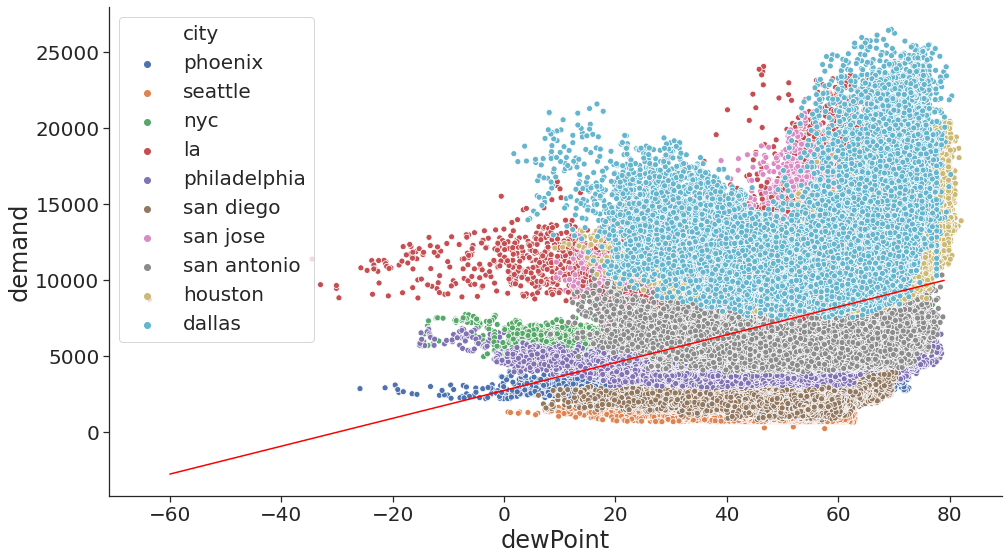

In [71]:
ax = sns.scatterplot(x=df_test['dewPoint'],y=df_test['demand'],hue=df['city'])
a1, b1 = np.polyfit(df_test['dewPoint'], df_test['demand'], 1)
line = np.arange(-60, 80, 1) * a1 + b1
ax.plot(np.arange(-60, 80, 1), line, color = 'red')

Just by looking at the data, we see why dew point has a higher $r^2$ value than temperature. It has a slightly more obvious trend as if we look at the bottom right corner of the data, we see that the higher dew point values have a higher demand. However the $r^2$ value is still really low, so we will start running multivariate regression with the best features to get the highest $r^2$

In [72]:
best_features = ['dewPoint', 'temperature', 'windBearing', 'humidity', 'windSpeed']
train, test, mse = run_regression(1, best_features)
print('The root mean squared error was:', mse)
print('The training R-squared value was:', train)
print('The testing R-squared value was:', test)

The root mean squared error was: 4415.350474650447
The training R-squared value was: 0.1343653963556921
The testing R-squared value was: 0.13500294857154993


We see that with extra features, our $r^2$ improves slightly from .099. We also tried to run some predictions with our model and found that the root mean squared error was around 4000. Considering that the range of our data is from 0 to 25000, an error of 4000 is pretty significant, but not too shabby. Next we want to add the city as a feature and see how large of a difference it makes.

In [100]:
for city in df['city'].unique():
  imputer = SimpleImputer()
  predictors = df.loc[df['city'] == city, best_features]
  
  predictors = pd.DataFrame(imputer.fit_transform(predictors.to_numpy().reshape(-1,len(best_features))))
  
  outcome = df.loc[df['city'] == city, 'demand']
  outcome = (pd.DataFrame(imputer.fit_transform(pd.DataFrame(outcome)))[0])

  # Summary

  # Prediction
  train_x, test_x, train_y, test_y = train_test_split(predictors, outcome)

  model = Pipeline([('poly', PolynomialFeatures(degree=1)),
                    ('linear', LinearRegression(fit_intercept=False))])
  
  model = model.fit(train_x.to_numpy().reshape(-1,len(best_features)), train_y)
  y_pred = model.predict(test_x)
  
  train_r_squared = model.score(train_x.to_numpy().reshape(-1,len(best_features)), train_y)
  test_r_squared = model.score(test_x.to_numpy().reshape(-1,len(best_features)), test_y)

  rMSE = mean_squared_error(test_y, y_pred, squared = False)
  print('For city: ', city, '\n', \
        '\tThe training r^2 was', train_r_squared, '\n', \
        '\tThe testing r^2 was', test_r_squared, '\n',\
        '\tThe root mean squared error was', rMSE, '\n')

For city:  phoenix 
 	The training r^2 was 0.4867091662082787 
 	The testing r^2 was 0.14136499639694067 
 	The root mean squared error was 1735.6668052013092 

For city:  seattle 
 	The training r^2 was 0.3282354537549521 
 	The testing r^2 was 0.2427209279480823 
 	The root mean squared error was 225.15690989747503 

For city:  nyc 
 	The training r^2 was 0.27932389853273576 
 	The testing r^2 was 0.2610553981440701 
 	The root mean squared error was 1109.9382062738994 

For city:  la 
 	The training r^2 was 0.36077019590877946 
 	The testing r^2 was 0.36174362195137755 
 	The root mean squared error was 2124.252612738109 

For city:  philadelphia 
 	The training r^2 was 0.04579260351717396 
 	The testing r^2 was 0.04695032543276866 
 	The root mean squared error was 823.0553929344704 

For city:  san diego 
 	The training r^2 was 0.411839072846397 
 	The testing r^2 was 0.42618188249251776 
 	The root mean squared error was 371.0270065578155 

For city:  san jose 
 	The training r^2

The linear regression performed very poorly on a city-by-city basis. The $r^2$ value was around 0.3 for the most part, and even dipped down to 0.04 in one case (Philadelphia). Other than Phoenix, the $r^2$ values were relatively consistent between training and test data however, which is a good sign.

In [73]:
train, test, mse = run_regression(1, best_features, summary = True, with_city = True)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                 2.044e+04
Date:                Thu, 11 Jun 2020   Prob (F-statistic):               0.00
Time:                        04:58:54   Log-Likelihood:            -1.5604e+06
No. Observations:              162572   AIC:                         3.121e+06
Df Residuals:                  162565   BIC:                         3.121e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.277e+04    128.832     99.103      0.0

Here we see that adding the city feature significantly boosts our R squared and our predictions become slightly more accurate with the lower root mean squared error. This tells us that the demand for electricity is highly correlated with its city, which makes a lot of sense as each city has their own regulations and patterns. However, we are training on a linear function. Let's try running different degree polynomials and see how accurate we can get our model.



In [74]:
max_test = 0
degree = 0
best_mse = 0
for i in range(2, 8):
  train, test, mse = run_regression(i, best_features, False, True)
  if test > max_test:
    max_test = test
    best_mse = mse
    degree = i
print('The best degree was:', degree)
print('The root mean squared error was:', best_mse)
print('The testing R-squared value was:', max_test)

The best degree was: 7
The root mean squared error was: 1855.8940712056046
The testing R-squared value was: 0.84554062509043


Interestingly, the best fit polynomial for our data is degree 7. With this, our predictions have drastically improved as we effectively halved the root mean squared error and doubled the R-squared value. This is about as good as we can get as we are limited on computing power to run regression with degrees or with more features. Mind that this model ran with the best 5 features. If we were to run this model with all the features available, we expect to see significant improvements. In sum, we were able to build a regression model that can predict with around an 1800 root mean squared error on a range from 0 to 25000. We also learn that the city explains most of the variance in the data. In terms of weather, the dew point, temperature, and wind bearing have the greatest correlation with the energy demand.

## Random Forest

In [0]:
def run_random_forest(features, num_estimators, with_city=False):
  imputer = SimpleImputer()

  predictors = df[features]
  predictors = pd.DataFrame(imputer.fit_transform(predictors), columns = predictors.columns, index=predictors.index)

  outcome = df['demand']
  outcome = (pd.DataFrame(imputer.fit_transform(pd.DataFrame(outcome)))[0])
  if with_city:
    encoder = LabelEncoder()
    predictors['city'] = encoder.fit_transform(df['city'])

  forest = RandomForestRegressor(n_estimators=num_estimators, max_depth = None, max_features='auto',\
                                min_impurity_decrease=0.1, max_samples=0.4)

  # RUN train-test split 75% <-> 25%, shuffles
  train_x, test_x, train_y, test_y = train_test_split(predictors, outcome, stratify=df['city'])

  forest.fit(train_x, train_y)
  y_pred = forest.predict(test_x)

  rMSE = mean_squared_error(test_y, y_pred, squared = False)
  

  cv_score = cross_val_score(forest, predictors, outcome, cv=KFold(shuffle=True), scoring='r2')
  print('Cross Validation Scores:', sorted(cv_score))
  return forest.score(train_x, train_y), forest.score(test_x, test_y), rMSE


# sns.boxplot(principal_df['demand'])
# cv_score = cross_val_score(forest, principal_df.drop(columns=['icon','demand', 'city']), principal_df['demand'], cv=KFold(shuffle=True), scoring='r2')
# print(sorted(cv_score))

Moving away from linear and polynomial regression, we will try using a Random Forest and see how well this model runs with our data. In the cell above, we set up a similar function to the linear regression where we can fine tune the parameters of the model.

In [76]:
%%time
train, test, rmse = run_random_forest(best_features, 10)
print('The root mean squared error was:', rmse)
print('The training R-squared value was:', train)
print('The testing R-squared value was:', test)


Cross Validation Scores: [0.31902926580687385, 0.3296521096434418, 0.3300163417274361, 0.3378678857953048, 0.338843647127159]
The root mean squared error was: 3842.6674806588826
The training R-squared value was: 0.6699316455170237
The testing R-squared value was: 0.33692893810508195
CPU times: user 23.4 s, sys: 133 ms, total: 23.5 s
Wall time: 23.5 s


Here, we run the model with default values and find similar values to that of our naive linear regression model. Next, let's run the model with the city data.

In [77]:
train, test, rmse = run_random_forest(best_features, 10, with_city=True)
print('The root mean squared error was:', rmse)
print('The training R-squared value was:', train)
print('The testing R-squared value was:', test)

Cross Validation Scores: [0.9187579401602833, 0.9293804264329638, 0.930702944684739, 0.9315256388444084, 0.9321388252378481]
The root mean squared error was: 1246.2000952387593
The training R-squared value was: 0.9627742116029092
The testing R-squared value was: 0.9307834562257744


In [94]:
for city in df['city'].unique():
  imputer = SimpleImputer()
  predictors = df.loc[df['city'] == city, best_features]
  
  predictors = pd.DataFrame(imputer.fit_transform(predictors.to_numpy().reshape(-1,len(best_features))))
  
  outcome = df.loc[df['city'] == city, 'demand']
  outcome = (pd.DataFrame(imputer.fit_transform(pd.DataFrame(outcome)))[0])

  # Summary

  # Prediction
  train_x, test_x, train_y, test_y = train_test_split(predictors, outcome)

  model = RandomForestRegressor(n_estimators=50, max_depth = None, max_features='auto',\
                                min_impurity_decrease=0.1, max_samples=0.4)
  
  model = model.fit(train_x.to_numpy().reshape(-1,len(best_features)), train_y)
  y_pred = model.predict(test_x)
  
  train_r_squared = model.score(train_x.to_numpy().reshape(-1,len(best_features)), train_y)
  test_r_squared = model.score(test_x.to_numpy().reshape(-1,len(best_features)), test_y)

  rMSE = mean_squared_error(test_y, y_pred, squared = False)
  print('For city: ', city, '\n', \
        '\tThe training r^2 was', train_r_squared, '\n', \
        '\tThe testing r^2 was', test_r_squared, '\n',\
        '\tThe root mean squared error was', rMSE, '\n')

For city:  phoenix 
 	The training r^2 was 0.86470190513529 
 	The testing r^2 was 0.21089845517923375 
 	The root mean squared error was 1655.4738673563284 

For city:  seattle 
 	The training r^2 was 0.7180498707001854 
 	The testing r^2 was 0.38709181899963496 
 	The root mean squared error was 181.04012975274048 

For city:  nyc 
 	The training r^2 was 0.8556900626751854 
 	The testing r^2 was 0.6855013896896859 
 	The root mean squared error was 737.1088944816288 

For city:  la 
 	The training r^2 was 0.8466059165415039 
 	The testing r^2 was 0.6615099344016064 
 	The root mean squared error was 1584.3083262120908 

For city:  philadelphia 
 	The training r^2 was 0.7794993938532115 
 	The testing r^2 was 0.5256117328124841 
 	The root mean squared error was 562.8918551646912 

For city:  san diego 
 	The training r^2 was 0.8030352932470408 
 	The testing r^2 was 0.5942940185771952 
 	The root mean squared error was 310.11710341919314 

For city:  san jose 
 	The training r^2 was 

When we run a by city analysis, we see decent results. They definitely exceed a linear model, but some of the testing $r^2$ were still pretty low here (0.2 to 0.3 range)

Finally, we're going to try running the model with the results from our small hyperparameter search (`n_estimators = 20 trees`)

In [105]:
%%time
train, test, rmse = run_random_forest(best_features, 50, True)
print('The root mean squared error was:', rmse)
print('The training R-squared value was:', train)
print('The testing R-squared value was:', test)

Cross Validation Scores: [0.9254132055877116, 0.9350937797433434, 0.9361546617927822, 0.9365020220067456, 0.9370815615288424]
The root mean squared error was: 1192.4488316296138
The training R-squared value was: 0.9684340094517597
The testing R-squared value was: 0.9364321621139697
CPU times: user 2min 1s, sys: 191 ms, total: 2min 1s
Wall time: 2min 1s


$W_{O^W}!$ With the city data, we instantly see massive improvements across the board. It is immediately clear that this model out performs linear regression. Our next step would be to run a small hyper parameter search to find the best parameters for our model. We also want to be wary of the time it takes our model to run, so we will time the model and graph it. 

In [79]:
rmse_list = []
time_list = []

num_trees = [1, 5, 10, 15, 20, 50, 100]
best_rmse = 10000
best_num_tree = 0
for i in num_trees: 
  print(i, 'tree(s)\n')
  start = time.time()
  train, test, rmse = run_random_forest(best_features, i, with_city=True)
  end = time.time()
  rmse_list.append(rmse)
  time_list.append(end - start)
  print('The root mean squared error was:', rmse)
  print('The training R-squared value was:', train)
  print('The testing R-squared value was:', test)
  if rmse < best_rmse:
    best_rmse = rmse
    best_num_tree = i

print('The most accurate model had', i, 'number of trees and a root mean squared error of', best_rmse)

1 tree(s)

Cross Validation Scores: [0.8632348084195252, 0.8708671718669155, 0.871552685919223, 0.8731836197433016, 0.8748531523133245]
The root mean squared error was: 1677.2064157332602
The training R-squared value was: 0.9104319782019746
The testing R-squared value was: 0.8732533547487829
5 tree(s)

Cross Validation Scores: [0.9118112641818968, 0.924088283118883, 0.9241518579558191, 0.9247603536355881, 0.9251771264747848]
The root mean squared error was: 1309.2587530377705
The training R-squared value was: 0.957075486911761
The testing R-squared value was: 0.9230563332841117
10 tree(s)

Cross Validation Scores: [0.9193384038062172, 0.9308077726078362, 0.9311407382033046, 0.931349431511347, 0.9316334604142369]
The root mean squared error was: 1247.9271571240572
The training R-squared value was: 0.9640526653557804
The testing R-squared value was: 0.9307395808948511
15 tree(s)

Cross Validation Scores: [0.920455580367952, 0.9324104239383036, 0.9330753937517929, 0.9330816413105882, 0.93

Text(240, 1200, '100')

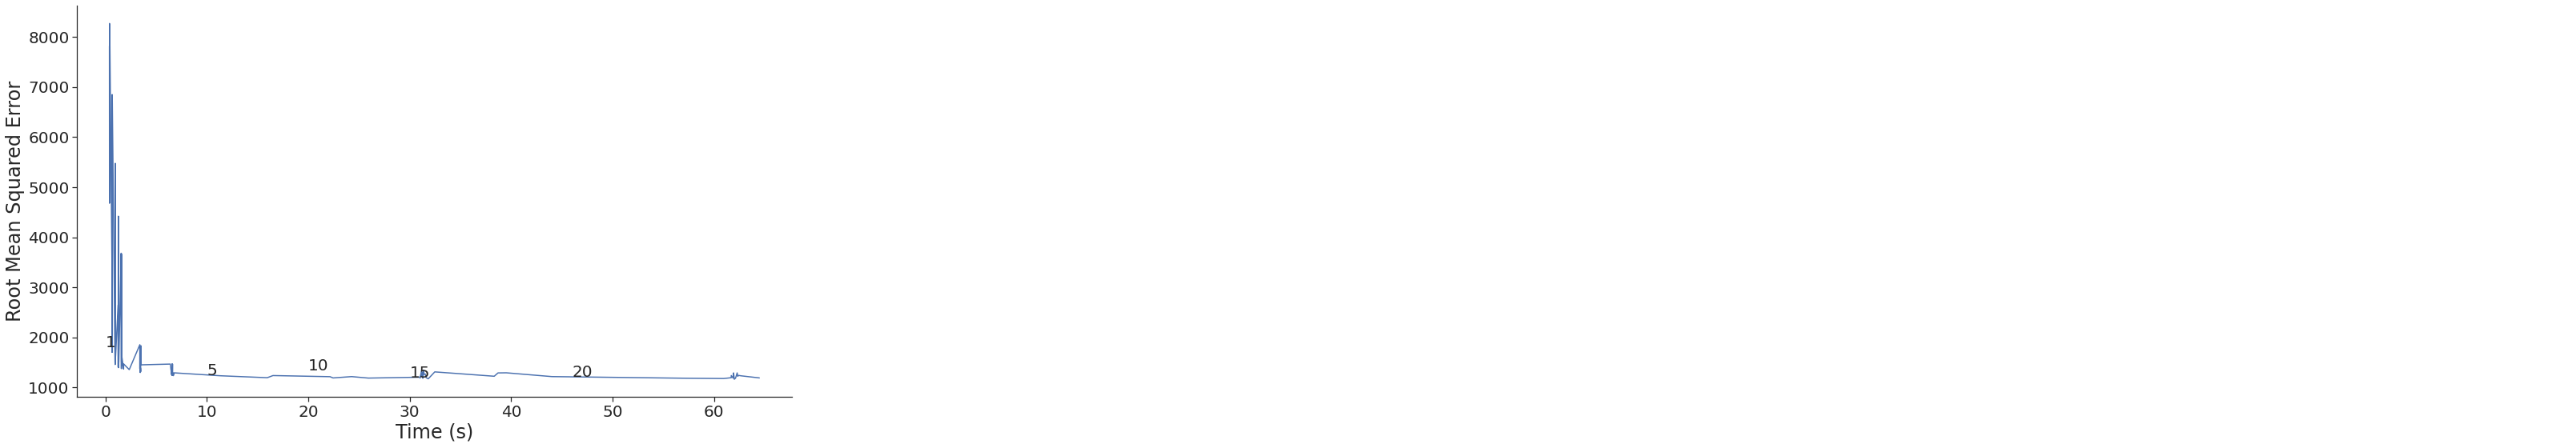

In [87]:
ax = sns.lineplot(x=time_list, y=rmse_list)
ax.set_xlabel("Time (s)")
ax.set_ylabel('Root Mean Squared Error')
ax.annotate('1', (0, 1800))
ax.annotate('5', (10, 1250))
ax.annotate('10', (20, 1350))
ax.annotate('15', (30, 1200))
ax.annotate('20', (46, 1220))
ax.annotate('50', (118, 1200))
ax.annotate('100', (240, 1200))

From this graph, the trend is that the more estimators we use the more accuracy we can achieve. However, we can see that after 20 estimators, we don't gain as much accuracy as fast as we lose runtime, so 20 estimators would be an optimal setting for our model. Note that in the interest of time and computing resources, we didn't run an actual randomized grid search as that would take days to finish running. However, if we were to, we'd expect a significant improvement in our model's accuracy. Out of all the predictive models we tried so far, Random Forest had the best accuracy with a root mean squared error of 1200 and $r^2$ of 93%. Next, let's try a gradient boosted trees model. 

## Gradient Booosted Trees (XGBoost)

In [0]:
def run_xgb(features, n_estimators=100, learning_rate = 0.1, early_stopping_rounds = 15, split=(0.7,0.1,0.2), with_city=False, cv=True, scoring='r2'):
  imputer = SimpleImputer()

  predictors = df[features]
  predictors = pd.DataFrame(imputer.fit_transform(predictors), columns = predictors.columns, index=predictors.index)

  outcome = df['demand']
  outcome = (pd.DataFrame(imputer.fit_transform(pd.DataFrame(outcome)))[0])

  if with_city:
    encoder = LabelEncoder()
    predictors['city'] = encoder.fit_transform(df['city'])
  
  xgb = XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, objective='reg:squarederror')

  # RUN train-test split 75% <-> 25%, shuffles
  train_val_x, test_x, train_val_y, test_y = train_test_split(predictors, outcome, test_size=split[-1])

  train_x, val_x, train_y, val_y = train_test_split(train_val_x, train_val_y, train_size=split[0])

  xgb.fit(train_x, train_y, early_stopping_rounds = early_stopping_rounds, eval_metric='rmse', eval_set=[[val_x, val_y]], verbose=False)
  y_pred = xgb.predict(test_x)

  rMSE = mean_squared_error(test_y, y_pred, squared = False)

  fit_params={'early_stopping_rounds': early_stopping_rounds, 
              'eval_metric': 'rmse',
              'verbose': False,
              'eval_set': [[val_x, val_y]]}

  if cv:
    xgb_r2 = cross_val_score(xgb, train_x, train_y, 
                        cv = KFold(shuffle=True), 
                        scoring = scoring,
                        fit_params = fit_params)
    print('Cross Validation Scores:', sorted(xgb_r2))
  return xgb.score(train_x, train_y), xgb.score(test_x, test_y), rMSE, xgb


Like we did for linear regression and the random forests, we set up a method that will train a XGBoost model given parameters so we don't have to duplicate as much code. 

In [82]:
print(run_xgb(best_features, 100, with_city=True))
print(run_random_forest(best_features, 100, with_city=True))

Cross Validation Scores: [0.9132102682051831, 0.9151746562039738, 0.9156823202045483, 0.9158634846283542, 0.9165284923994578]
(0.9166750130477082, 0.9032098871271691, 1482.527827806505, XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1))
Cross Validation Scores: [0.9254746160938603, 0.9357263522087125, 0.9359721787909917, 0.9368864462275669, 0.9383144249010815]
(0.968792959756783, 0.9376883865537536, 1180.8775898593417)


When we compare the scores between a random forest model and an XGBoost model with similar parameters, we see that the random forest actually performs a lot better, and the boosted trees cannot really keep up.

In [98]:
for city in df['city'].unique():
  imputer = SimpleImputer()
  predictors = df.loc[df['city'] == city, best_features]
  
  predictors = pd.DataFrame(imputer.fit_transform(predictors.to_numpy().reshape(-1,len(best_features))))
  
  outcome = df.loc[df['city'] == city, 'demand']
  outcome = (pd.DataFrame(imputer.fit_transform(pd.DataFrame(outcome)))[0])

  # Summary

  # Prediction
  train_x, test_x, train_y, test_y = train_test_split(predictors, outcome)

  model = XGBRegressor(n_estimators=500, learning_rate=0.2, objective='reg:squarederror')
  
  model = model.fit(train_x.to_numpy().reshape(-1,len(best_features)), train_y)
  y_pred = model.predict(test_x.to_numpy().reshape(-1, len(best_features)))
  
  train_r_squared = model.score(train_x.to_numpy().reshape(-1,len(best_features)), train_y)
  test_r_squared = model.score(test_x.to_numpy().reshape(-1,len(best_features)), test_y)

  rMSE = mean_squared_error(test_y, y_pred, squared = False)
  print('For city: ', city, '\n', \
        '\tThe training r^2 was', train_r_squared, '\n', \
        '\tThe testing r^2 was', test_r_squared, '\n',\
        '\tThe root mean squared error was', rMSE, '\n')

For city:  phoenix 
 	The training r^2 was 0.8823766074474775 
 	The testing r^2 was 0.49186193069340867 
 	The root mean squared error was 736.66055887741 

For city:  seattle 
 	The training r^2 was 0.7074800367638474 
 	The testing r^2 was 0.3556119370025549 
 	The root mean squared error was 160.88572603408264 

For city:  nyc 
 	The training r^2 was 0.7459725396791619 
 	The testing r^2 was 0.6543238836739406 
 	The root mean squared error was 780.2592043886834 

For city:  la 
 	The training r^2 was 0.7649758968908522 
 	The testing r^2 was 0.6678931138608131 
 	The root mean squared error was 1531.7171065581224 

For city:  philadelphia 
 	The training r^2 was 0.6583400686433507 
 	The testing r^2 was 0.48621208400898525 
 	The root mean squared error was 587.8954794297844 

For city:  san diego 
 	The training r^2 was 0.6878673789035695 
 	The testing r^2 was 0.5749963286615934 
 	The root mean squared error was 310.4238519769631 

For city:  san jose 
 	The training r^2 was 0.

It looks running a city by city analysis gives better results than a linear regression but worse results than a random forest.

In [89]:
%%time
print(run_xgb(features, n_estimators=1000, learning_rate=0.2, early_stopping_rounds=10, with_city=True, cv=True)[:-1])

Cross Validation Scores: [0.9333383172427722, 0.9356477769666065, 0.9364032758561974, 0.936963877622109, 0.9380648556434251]
(0.9461522394290351, 0.9373713575537966, 1176.4466902551092)
CPU times: user 3min 35s, sys: 408 ms, total: 3min 35s
Wall time: 3min 36s


When we ran a hyperparameter search to tune our model (code below), we found that these were the ideal values for our tree. The boosted trees model performed slightly better than our Random Forest (as measured by root mean squared error), but it came with a much higher training time and 10 times as many trees. Overall, random forests seem to be our best bet.

In [84]:
rmse_list = []
time_list = []

num_trees = [1, 5, 10, 15, 20, 50, 100, 500, 1000]
learning_rates = [0.05, 0.1, 0.2, 0.3, 0.5]
early_stopping_rounds = [10, 15, 20, 50]

best_params = ()
best_rmse = np.inf
for n_estimators in num_trees: 
  for learning_rate in learning_rates:
    for early_stop in early_stopping_rounds:
      print(n_estimators, learning_rate, early_stop, '\n')
      start = time.time()
      train, test, rmse, _ = run_xgb(features, n_estimators = n_estimators, \
                                     learning_rate=learning_rate, \
                                     early_stopping_rounds = early_stop,\
                                     with_city=True, cv=False)
      end = time.time()
      rmse_list.append(rmse)
      time_list.append(end - start)
      print('The root mean squared error was:', rmse)
      print('The training R-squared value was:', train)
      print('The testing R-squared value was:', test)
      if rmse < best_rmse:
        best_rmse = rmse
        best_params = (n_estimators, learning_rate, early_stop)

print('The most accurate model had the following params', best_params, 'with a root mean squared error of', best_rmse)

1 0.05 10 

The root mean squared error was: 8240.137030758257
The training R-squared value was: -2.038528662313009
The testing R-squared value was: -2.0543815471376123
1 0.05 15 

The root mean squared error was: 8237.04200790244
The training R-squared value was: -2.043877647339006
The testing R-squared value was: -2.0511092435103784
1 0.05 20 

The root mean squared error was: 8200.574296923498
The training R-squared value was: -2.023326766830432
The testing R-squared value was: -2.048932767763211
1 0.05 50 

The root mean squared error was: 8269.981316839752
The training R-squared value was: -2.029302741537291
The testing R-squared value was: -2.061715227381064
1 0.1 10 

The root mean squared error was: 7818.637525268844
The training R-squared value was: -1.7478418582074542
The testing R-squared value was: -1.7415115912118664
1 0.1 15 

The root mean squared error was: 7843.136684925049
The training R-squared value was: -1.733707964133529
The testing R-squared value was: -1.7470217

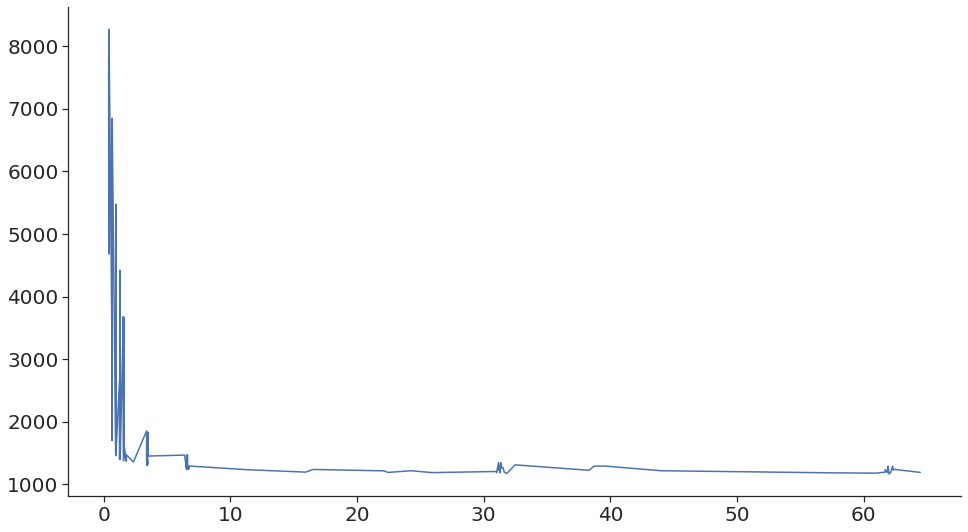

In [86]:
ax = sns.lineplot(x=time_list, y=rmse_list)

Overall, the XGBoost models didn't do very well, and we had much more success with Random Forests. To acheive comparable performance to our best random forest took 10 times as many trees and twice as much time.

# Summary of Analysis

We used a variety of plots (mostly lineplots) to visualize our data. Since it was all timeseries data, lineplots allowed us to see patterns and shifts. We also used some KDE plots, histograms, and swarmplots since these allowed us to see the distribution of our variables which informed us of what strategies we could use. We also grouped by time to see trends over different weeks and months.

For our predictive analysis, we used PCA to try and reduce and features and see any clustering that we didn't notice before, linear and polynomial regression as a starter model since a previous paper had quite some success with it, random forests because they are highly effective models for non-linear data, and gradient boosted forests with XGBoost because gradient boosted trees are often effective at improving upon random forest models since they iteratively add trees. 

PCA did not work very well because the data was very non-linear, and PCA depends on the linearity of data to extract features properly. Linear and polynomial regression were actually quite successful, coming in at $r^2$ of about 90%, but we knew we could do better with more advanced models. Between the tree based models, random forests were more successful, giving comparable $r^2$ and RMSE with significantly shorter training times.

# Ethics and Privacy

### Questions
The questions we asked do not run afoul of any ethics concerns, and it would be difficult to use them to discriminate against any particular group. It is possible that if the electricity suppliers were to be consolidated into a monopoly, this new company could use some of our findings (different consumptions between different cities and different reactions to weather patterns between cities) to discriminate between electricity prices in these cities. However, this is relatively unlikely to happen. 

### Energy Data
Since electricity companies like ERCOT would not hand over private operating data that could pose a risk to their intellectual property and financial statements, it's safe to assume that the data is generalized enough that no privacy-compromising location data has been included in this dataset. 

The data reported by the EIA is separated into electricity provider subregions, which are quite large and contain significantly larger populations than 20000. Therefore, these data are already in line with the Safe Haven Privacy Principles, and no additional filtering is required to maintain individuals' privacy. 

### Weather Data

As all of the data sourced by DarkSky are public and not related to any individual, the weather data does not pose any privacy risks. 

### Biases
A bias that we see in our dataset is that some energy companies like ERCOT did not properly report their data to the EIA. Instead, we had to use their independent reporting system. There is a chance that they reported the data differently than the EIA (used a different method of measuring or aggregated data in a different method), which would have skewed our analysis and lead to a less effective model.

### Analysis
Our analysis does not find any personally identifying information. Rather, it looks for generalized trends within the data, and tries to use these to make predictions. It would be quite difficult for our data to be used for any discrimation or other nefarious ongoings. 

# Conclusion

### Question 1: What is the impact of temperature, precipitation, and severe weather phenomena such as thunderstorms and snow upon people’s electricity consumption patterns throughout the US?

Based on our analysis, it is reasonable to say that temperature, precipitation, windspeed, and severe weather phenomena all have very little impact on people's electricity consumption. Temperature explained the most variance in electricity consumption with an $r^2$ value of 10%, and wind speed explained the least variance with an $r^2$ value of approximately 1.5%. 

This is actually quite surprising to us, because we expected there to be some relationship between all of these features.

### Question 2: Do different regions in the United States shift their electricity consumption differently in response to similar changes in weather patterns?

From our findings in exploratory data analysis, it seems like the different cities across the United States do not shift their electrical consumption in any predictable way related to weather phenomena.

When we examined certain weather phenomena trends by city in Cross City Analysis, we saw that for temperature and windspeeds, all the cities had similar means and mostly large spreads. For humidity and precipitation, we saw a bit more variation, as Phoenix is located in a desert and thus experiences lower humidity and precipitation rates. Furthermore, Seattle, as expected, records higher chances of precipitation overall.

However, any observable differences in weather trends among our various cities did not reflect in the plots of energy consumption. In fact, there seemed to be no real pattern in the spreads of energy consumption by city. Cities like NYC and San Diego were much lower than expected, while some cities like Dallas and San Jose were consumers of higher amounts of energy. 

All in all, exploratory data analysis did not demonstrate or suggest any relationships between weather patterns and electrical consumption in various regions of the United States.

### Question 3: Can we use weather phenomena to predict electrical consumption?

Based on our findings, we cannot use weather phenomena to predict electrical consumption.

Because there is very little relationship between these weather features and demand, our models using only weather features did quite poorly, never exceeding an $r^2$ of 18% on linear models and 32% on Random Forest models. The best models were when the data was stratified by city before regression, which led to a significantly higher $r^2$ of 81% with a linear model and an $r^2$ of 93% with a Random Forest model. This leads us to believe that the models are not actually predicting electricity consumption using weather data, but simply using the city. 

Overall, our Random Forest models did better for regression than the linear models. We believe this is because the data is so non-linear that even a polynomial regression cannot handle the data well. We also tried a gradient boosted trees model (XGBoost) but surprisingly that performed much worse than the bagged Random forest models with an $r^2$ of 15%.

### Limitations

There are some limitations to our analysis. One limitation is computing resources and time. If time wasn't a constraint or if we had more powerful hardware, such as GPUs and etc, we would be able to run more intensive models. We had plans to run neural networks, but found ourselves lacking the time to do so. As noted in the predictive analysis sections, our number of features were limited and the extent to which we could run our hyperparameter search was also limited. Additionally, our data was only based on 10 cities. It would've been interesting to extend our analysis on a larger set of cities to see if that would change any patterns that we observed, but alas, that was a bit too ambitious for the timeframe we were looking at. 

### Final Thoughts

We found that each city has very unique and specific energy demand patterns, so we believe that using location based features rather than weather features will be much more impactful for energy companies looking to balance the grid. We hope that our results will be able to help areas that would benefit off of more renewable electricity, particularly where more energy is consumed due to the weather patterns that exist within these regions.

In conclusion, we found that the relationship between weather and energy consumption is a lot more complicated than we hypothesized, and therefore, there is very little impact of weather phenomena on electricity consumption patterns. As a result, weather phenomena cannot be used to effectively predict electricity consumption. 
